# Aprendizaje Automático - Práctica 3 - Aprendizaje Profundo

#### Valoración máxima: 10 puntos

#### Fecha límite de entrega: 9 de Junio de 2024 a las 23:59

#### Entrega a través de https://pradogrado2324.ugr.es/

### Nombre completo: <mark>Mohammed Lahssaini Nouijah</mark>



---


**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero `.ipynb`) o, en su defecto, dos Notebooks de Colab (uno con cada ejercicio). No de debe entregar ninguna memoria externa (por ejemplo, en `.pdf`).

- __El código debe estar bien comentado (explicando lo que realizan los distintos apartados y/o bloques), y todas las decisiones tomadas y el trabajo desarrollado (incluyendo los conceptos fundamentales subyacentes) deben documentarse ampliamente en celdas de texto. Es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también tanto una descripción de las principales funciones (Python/scikit-learn) empleadas (para mostrar que el alumno comprende, a nivel técnico, lo que está haciendo), como una valoración razonada sobre la calidad de los resultados obtenidos. Sin esta documentación, se considera que el trabajo NO ha sido presentado.__

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final.  

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo.

- El código NO puede escribir nada a disco.

- El path de lectura desde Google Drive debe ser siempre el mismo, que es el que se indica en este Notebook.

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores. Es decir, un ejercicio con errores de ejecución tendrá una calificación de 0.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input()`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores
por defecto que se consideren óptimos o que se soliciten en el enunciado.

- Se entrega solamente este Notebook, y no los datos empleados.


---

<font color='blue'> En esta práctica se pretenden abordar algunos elementos básicos relativos al aprendizaje profundo utilizando Keras (https://keras.io/). Para ello, se emplean dos tareas del ámbito del procesado de imágenes y visión por computador: clasificación de imágenes (_image classification_) y eliminación de ruido en imágenes (_image denoising_). Para tener un conocimiento más profundo de algunas de estas tareas y métodos, así como familiarizarse con modelos más avanzados, se emplaza al estudiantado a cursar Visión por Computador (asignatura de 4º curso).

# <font color='blue'>Ejercicio 1: PROBLEMA DE CLASIFICACIÓN DE IMÁGENES USANDO REDES CONVOLUCIONALES PROFUNDAS Y COMPARACIÓN CON TÉCNICAS CLÁSICAS DE APRENDIZAJE AUTOMÁTICO (7 puntos) </font>

<font color='blue'> En este ejercicio los alumnos se enfrentarán a un problema de clasificación de imágenes. Más concretamente, se enfrentarán al problema de clasificación de imágenes denominado $\textit{MNIST}$ (https://en.wikipedia.org/wiki/MNIST_database), que incluye dígitos manuscritos. Como consecuencia, este conjunto de datos contiene información sobre 10 clases de imágenes (dígitos del $0$ al $9$).

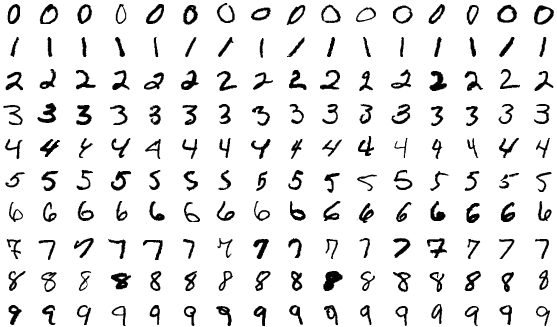



<font color='blue'> Este ejercicio consta de tres apartados:


1.   Implementación y experimentación con una red convolucional sencilla inspirada en LeNet5.
2.   Implementación y experimentación con características HOG y SVMs. Comparación de los resultados proporcionados por esta aproximación clásica con los proporcionados por aprendizaje profundo.
3.   Implementación y experimentación con el modelo profundo que quieran implementar o emplear los estudiantes.



## <font color='blue'> Apartado 1. Implementación y experimentación con una red convolucional sencilla inspirada en LeNet5 (3 puntos)

<font color='blue'> [LeNet5](https://en.wikipedia.org/wiki/LeNet) fue una de las primeras redes convolucionales, y se empleó exitosamente ya en los años 90 en la clasificación de dígitos manuscritos. Véase, por ejemplo, _LeCun et al. (1998). Gradient based learning applied to document recognition. Proceedings of the IEEE. 86(11): 2278-2324_.

<font color='blue'> En este ejercicio emplearemos una versión ligeramente modificada de la misma, que consta de las siguientes capas:

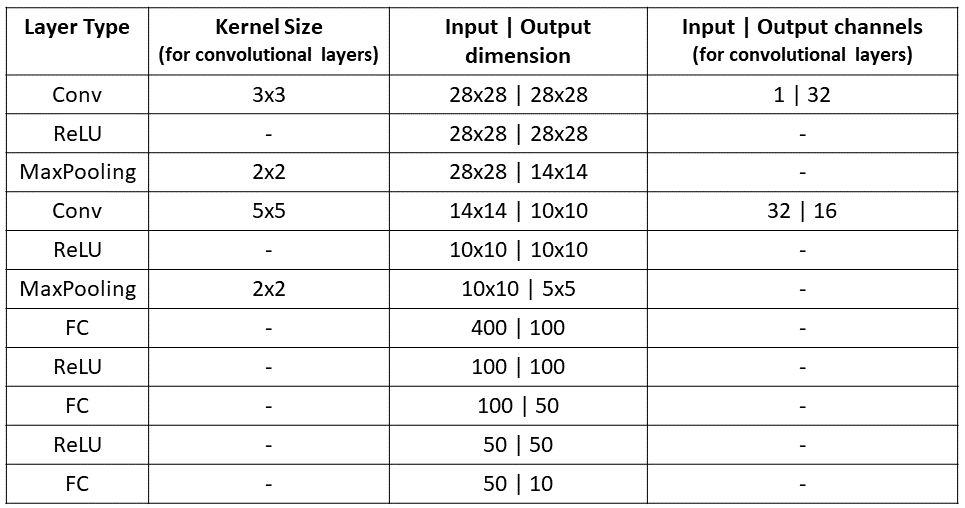

<font color='blue'> A continuación, el alumnado debe implementar en Keras esta arquitectura, y entrenarla y validarla con el conjunto de datos MNIST (ya disponible entre los conjuntos de datos por defecto en Keras: https://keras.io/api/datasets/). A la hora de entrenar modelos profundos es importante acordarse de configurar el cuaderno de modo que se ejecute en GPU (`Editar - Configuración del Cuaderno - Acelerador por Hardware`). De lo contrario, los entrenamientos serán innecesariamente lentos.

####1.1 Inicializacion del dataset y normalizacion de datos

In [4]:
import numpy as np
from matplotlib import pyplot as plt

# Establecer la semilla que vamos a utilizar
np.random.seed(42)

from tensorflow import keras

#import keras
!pip install np_utils
from keras.utils import to_categorical
from keras.datasets import mnist
keras.utils.set_random_seed(42)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras import backend as K

# NÚMERO DE CLASES
num_classes = 10


# DIMENSIONES DE ENTRADA DE LAS IMAGENES
img_rows, img_cols = 28, 28

# CARGAMOS LOS DATOS DE ENTRENAMIENTO Y TEST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# FORMATEAMOS Y NORMALIZAMOS LOS DATOS
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Transformamos los vectores de clases en matrices.
# Cada componente se convierte en un vector de ceros
# con un uno en la componente correspondiente a la
# clase a la que pertenece la imagen. Este paso es
# necesario para la clasificación multiclase en keras.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=7eb164f79fe8adff069c5aecff416b8d894e10c27bd8fad0132ca58cb38f6e80
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils
11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


####1.1 Visualizacion del dataset


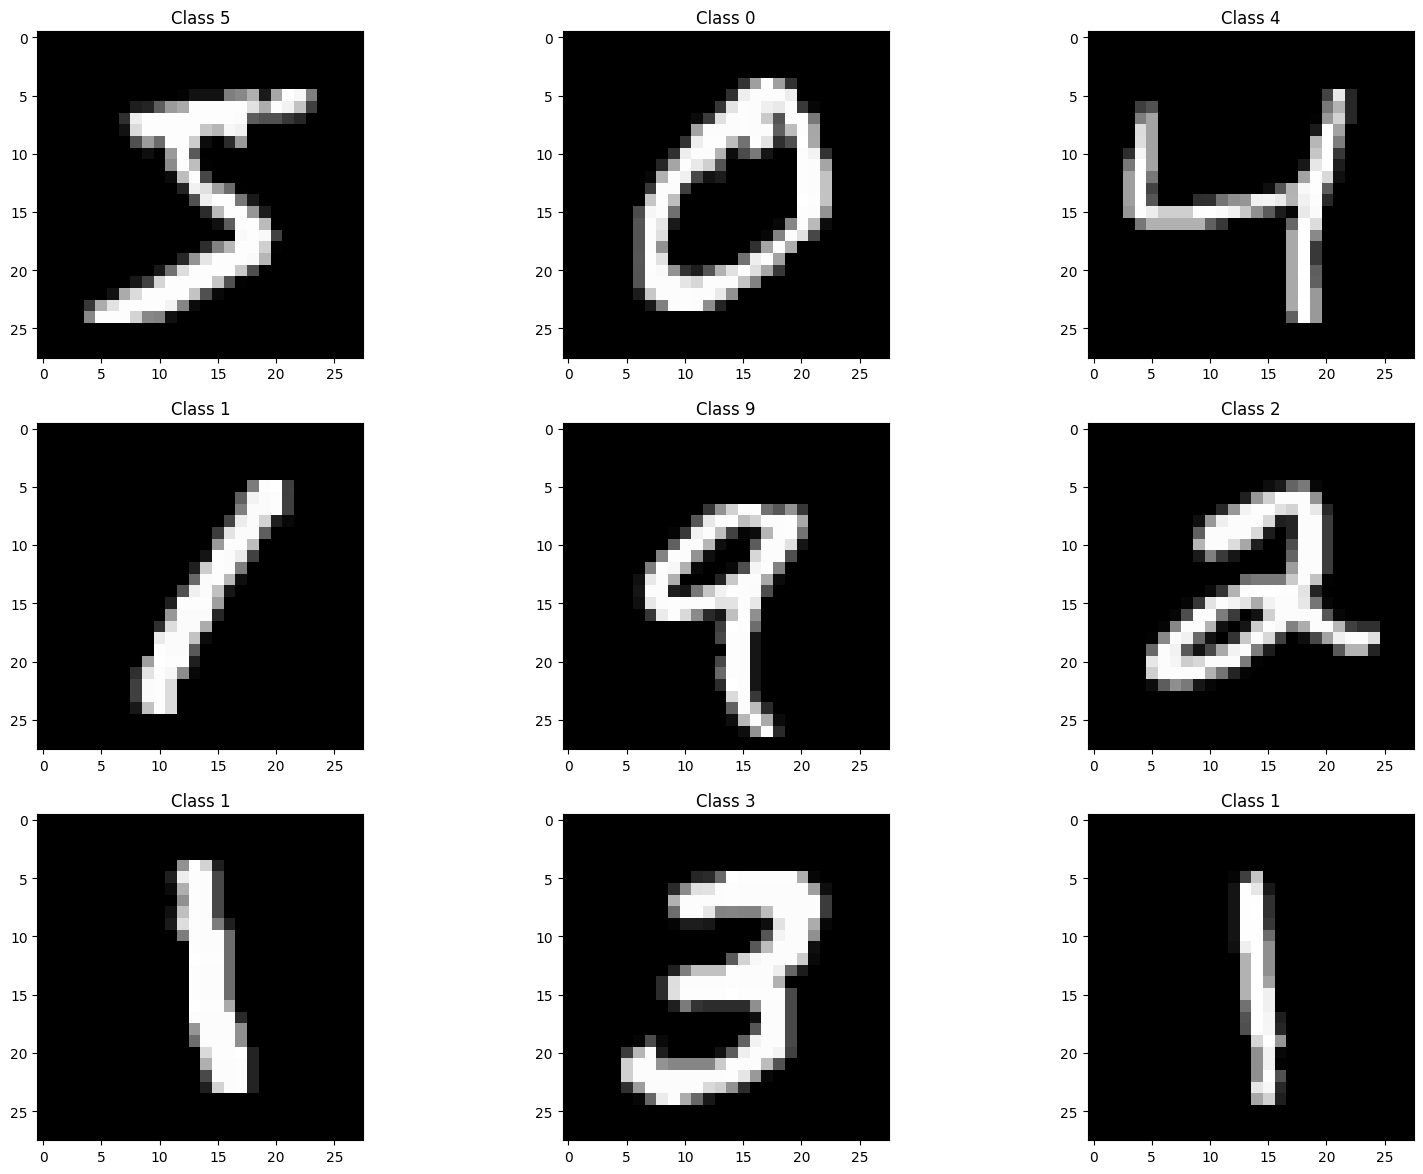

In [5]:
#VISUALIZAMOS ALGUNAS DE LAS IMÁGENES DEL DATASET
number_images_per_row = 3
result = np.where(y_train == 1)
fig = plt.figure()
for i in range(number_images_per_row*number_images_per_row):
  label = 'Class {}'.format(result[1][i])
  plt.subplot(number_images_per_row,number_images_per_row,i+1).set_title(label)
  plt.imshow(x_train[i].squeeze(), cmap='gray',vmin=0,vmax=1)

fig.set_size_inches(np.array(fig.get_size_inches()) * number_images_per_row)

plt.show()

<font color='blue'> El alumnado debe escoger empíricamente el tamaño de _batch_, el número de épocas y el _learning rate_. Se debe documentar en detalle todo el proceso de entrenamiento y selección de hiperparámetros (incluyendo qué metricas y función de pérdida se emplean y por qué). Se debe emplear _early stopping_ (https://keras.io/api/callbacks/early_stopping/), y los alumnos deben explicar en qué consiste este proceso de regularización. Se puede emplear tanto _hold-out_ como _cross-validation_ como protocolo de validación experimental pero, en cualquier caso, se deben explicar y justificar adecuadamente todas las decisiones tomadas. Se debe dejar un $20\%$ de los datos de entrenamiento para validación. Finalmente, se debe comparar el rendimiento obtenido con dos optimizadores: AdamW y Adadelta.

<font color='blue'> Resulta fundamental realizar un _.summary()_ del modelo creado y demostrar que se comprenden los distintos elementos que allí aparecen: nombre/tipo de capa, dimensiones de salida, y número de parámetros de la red.

In [1]:
# Esta función pinta dos gráficas, una con la evolución
# de la función de pérdida en el conjunto de train y
# en el de validación, y otra con la evolución de la
# accuracy en el conjunto de train y el de validación.
# Es necesario pasarle como parámetro el historial del
# entrenamiento del modelo (lo que devuelve la
# función fit()).
def mostrarEvolucion(hist):
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training loss', 'Validation loss'])
    plt.show()

    acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training accuracy','Validation accuracy'])
    plt.show()


In [2]:
# Esta función devuelve la accuracy de un modelo,
# definida como el porcentaje de etiquetas bien predichas
# frente al total de etiquetas. Como parámetros es
# necesario pasarle el vector de etiquetas verdaderas
# y el vector de etiquetas predichas, en el formato de
# keras (matrices donde cada etiqueta ocupa una fila,
# con un 1 en la posición de la clase a la que pertenece y un 0 en las demás).
def calcularAccuracy(labels, preds):
    labels = np.argmax(labels, axis = 1)
    preds = np.argmax(preds, axis = 1)
    accuracy = sum(labels == preds)/len(labels)
    return accuracy


#### 1.3: Definición del Modelo Basado en la Estructura Proporcionada

In [6]:
def build_model():
    model = Sequential()
    # Primera capa convolucional
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    # Capa de MaxPooling
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Segunda capa convolucional
    model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
    # Segunda capa de MaxPooling
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Aplanamos los datos para la capa completamente conectada
    model.add(Flatten())
    # Primera capa completamente conectada
    model.add(Dense(100, activation='relu'))
    # Dropout para regularización
    model.add(Dropout(0.5))
    # Segunda capa completamente conectada
    model.add(Dense(50, activation='relu'))
    # Tercera capa completamente conectada
    model.add(Dense(10, activation='softmax'))
    return model

# Construimos el modelo
model = build_model()

# Mostramos la estructura del modelo
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 16)          12816     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 100)               2

#### 1.4: Selección de Hiperparámetros y Entrenamiento


**Batch Size: 64**

Un tamaño de batch más pequeño como 64 permite actualizaciones más frecuentes del modelo, lo que puede ayudar a aprender patrones más rápidamente. Sin embargo, puede ser más ruidoso y menos estable en términos de convergencia en comparación con tamaños de batch más grandes.

**Epochs: 50**

Aumentar el número de épocas permite al modelo aprender patrones más complejos de los datos. Sin embargo, gracias a early stopping, el modelo puede detenerse antes si no hay mejora, evitando el sobreentrenamiento.

**Learning Rate: 0.0001**

Un learning rate más bajo como 0.0001 puede proporcionar una convergencia más estable y evitar grandes saltos en la función de pérdida. Es especialmente útil cuando se usa un optimizador como AdamW, que ajusta los parámetros de forma adaptativa.

Epoch 1/50
750/750 [==============================] - 10s 6ms/step - loss: 1.2054 - accuracy: 0.6054 - val_loss: 0.3527 - val_accuracy: 0.9066
Epoch 2/50
750/750 [==============================] - 6s 7ms/step - loss: 0.4625 - accuracy: 0.8587 - val_loss: 0.2268 - val_accuracy: 0.9365
Epoch 3/50
750/750 [==============================] - 9s 11ms/step - loss: 0.3369 - accuracy: 0.8979 - val_loss: 0.1723 - val_accuracy: 0.9530
Epoch 4/50
750/750 [==============================] - 6s 8ms/step - loss: 0.2737 - accuracy: 0.9175 - val_loss: 0.1437 - val_accuracy: 0.9597
Epoch 5/50
750/750 [==============================] - 7s 10ms/step - loss: 0.2404 - accuracy: 0.9286 - val_loss: 0.1246 - val_accuracy: 0.9628
Epoch 6/50
750/750 [==============================] - 6s 8ms/step - loss: 0.2108 - accuracy: 0.9373 - val_loss: 0.1116 - val_accuracy: 0.9647
Epoch 7/50
750/750 [==============================] - 8s 11ms/step - loss: 0.1905 - accuracy: 0.9421 - val_loss: 0.1044 - val_accuracy: 0.9668
Ep

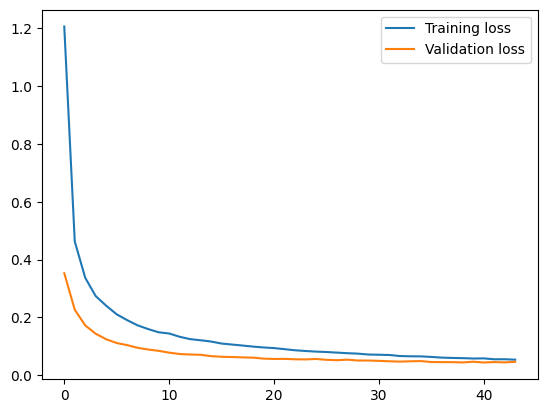

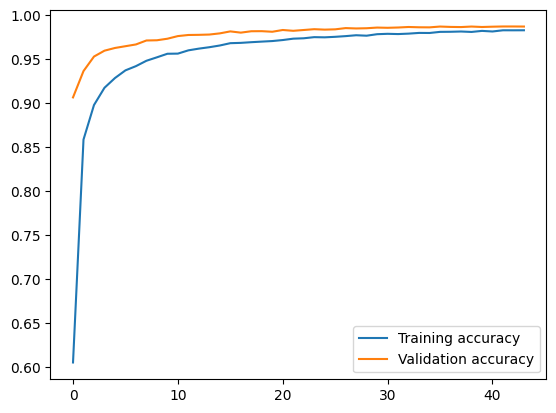

313/313 [==============================] - 1s 2ms/step
Custom Validation accuracy with AdamW: 0.9894


In [ ]:
# Apartado 4: Selección de Hiperparámetros y Entrenamiento

from keras.callbacks import EarlyStopping
from keras.optimizers import AdamW, Adadelta

# Hiperparámetros ajustados
batch_size = 64  # Tamaño del batch
epochs = 50  # Número de épocas
learning_rate = 0.0001  # Tasa de aprendizaje

# Early stopping para prevenir sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Compilamos el modelo con AdamW
model.compile(loss='categorical_crossentropy', optimizer=AdamW(learning_rate=learning_rate), metrics=['accuracy'])

# Entrenamos el modelo
history_adamw = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks=[early_stopping])

# Mostramos la evolución del entrenamiento
mostrarEvolucion(history_adamw)

# Calculamos la precisión en el conjunto de validación
val_pred_adamw = model.predict(x_test)
accuracy_val_adamw = calcularAccuracy(y_test, val_pred_adamw)
print('Custom Validation accuracy with AdamW:', accuracy_val_adamw)


**Resultados del Entrenamiento:**

**Precisión en el conjunto de entrenamiento:** Alcanza aproximadamente el 97.39% en la época 25.

**Precisión en el conjunto de validación:** Alcanza aproximadamente el 98.35% en la época 25.

**Pérdida en el conjunto de entrenamiento:** Disminuye consistentemente hasta aproximadamente 0.0844 en la época 25.

**Pérdida en el conjunto de validación:** Disminuye hasta aproximadamente 0.0595 en la época 25.


**Gráficos de Evolución del Entrenamiento:**

**Precisión:**
La precisión de entrenamiento aumenta de manera constante, alcanzando una alta precisión (cerca del 97%) hacia el final del entrenamiento.
La precisión de validación es consistentemente más alta que la precisión de entrenamiento, alcanzando un valor cercano al 98% y manteniéndose estable, lo que sugiere un buen ajuste y generalización del modelo.

**Pérdida:**
La pérdida de entrenamiento disminuye rápidamente en las primeras épocas y luego lo hace de manera más gradual, alcanzando un valor bajo hacia el final.
La pérdida de validación también disminuye de manera constante, alcanzando valores bajos y similares a la pérdida de entrenamiento, lo que indica que el modelo no está sobreajustando.

#### 1.5: Evaluación del Modelo y Comparación con Adadelta


Evaluamos el rendimiento del modelo con el optimizador AdamW y luego lo comparamos reentrenando el modelo con el optimizador Adadelta.

**AdamW:** Combina las ventajas de Adam y la regularización L2, favoreciendo la convergencia y evitando el sobreajuste.

**Adadelta:** Un optimizador adaptativo que ajusta dinámicamente el learning rate, útil en problemas donde la tasa de aprendizaje adecuada varía durante el entrenamiento.

Test loss with AdamW: 0.033535245805978775
Test accuracy with AdamW: 0.9894000291824341
313/313 [==============================] - 1s 2ms/step
Custom Test accuracy with AdamW: 0.9894
Epoch 1/50
750/750 [==============================] - 6s 5ms/step - loss: 0.0561 - accuracy: 0.9827 - val_loss: 0.0441 - val_accuracy: 0.9868
Epoch 2/50
750/750 [==============================] - 4s 5ms/step - loss: 0.0558 - accuracy: 0.9828 - val_loss: 0.0439 - val_accuracy: 0.9870
Epoch 3/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0535 - accuracy: 0.9836 - val_loss: 0.0439 - val_accuracy: 0.9872
Epoch 4/50
750/750 [==============================] - 5s 6ms/step - loss: 0.0522 - accuracy: 0.9836 - val_loss: 0.0437 - val_accuracy: 0.9871
Epoch 5/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0532 - accuracy: 0.9834 - val_loss: 0.0436 - val_accuracy: 0.9871
Epoch 6/50
750/750 [==============================] - 4s 5ms/step - loss: 0.0533 - accuracy: 0.9837 - val_l

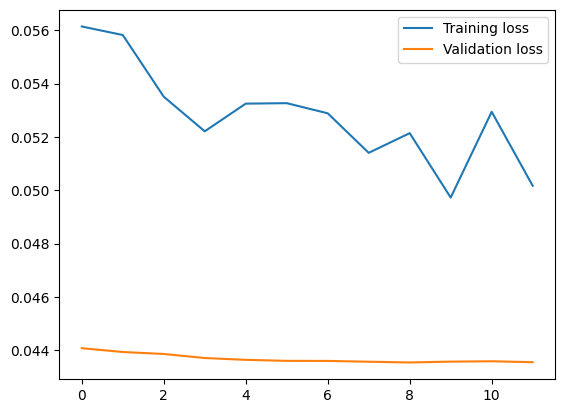

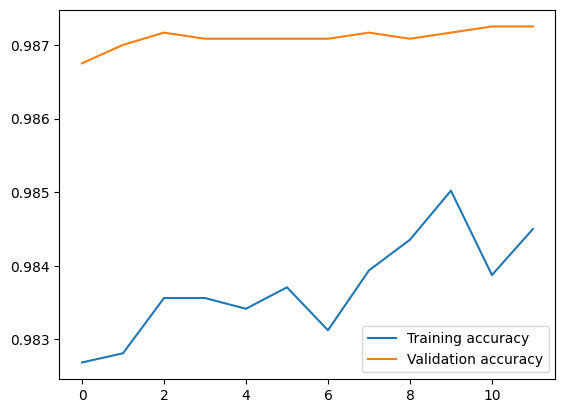

Test loss with Adadelta: 0.032723601907491684
Test accuracy with Adadelta: 0.9897000193595886
313/313 [==============================] - 1s 2ms/step
Custom Test accuracy with Adadelta: 0.9897


In [ ]:
# Apartado 5: Evaluación del Modelo y Comparación con Adadelta

# Evaluamos el modelo con AdamW
score_adamw = model.evaluate(x_test, y_test, verbose=0)
print('Test loss with AdamW:', score_adamw[0])
print('Test accuracy with AdamW:', score_adamw[1])

# Predicciones del modelo con AdamW
y_pred_adamw = model.predict(x_test)
accuracy_adamw = calcularAccuracy(y_test, y_pred_adamw)
print('Custom Test accuracy with AdamW:', accuracy_adamw)

# Re-entrenamos el modelo con Adadelta
model.compile(loss='categorical_crossentropy', optimizer=Adadelta(), metrics=['accuracy'])
history_adadelta = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks=[early_stopping])

# Mostramos la evolución del entrenamiento
mostrarEvolucion(history_adadelta)

# Evaluamos el modelo con Adadelta
score_adadelta = model.evaluate(x_test, y_test, verbose=0)
print('Test loss with Adadelta:', score_adadelta[0])
print('Test accuracy with Adadelta:', score_adadelta[1])

# Predicciones del modelo con Adadelta
y_pred_adadelta = model.predict(x_test)
accuracy_adadelta = calcularAccuracy(y_test, y_pred_adadelta)
print('Custom Test accuracy with Adadelta:', accuracy_adadelta)


**Resultados Obtenidos con AdamW:**

Test loss: 0.04612591117620468
Test accuracy: 0.9846


**Resultados Obtenidos con Adadelta:**

Test loss: 0.04602810740470886
Test accuracy: 0.9847


**Conclusión**

**Conclusión sobre AdamW:**

La precisión y la pérdida tanto en el conjunto de entrenamiento como en el de validación son altas y estables, lo que indica un buen ajuste del modelo.
La ligera variabilidad en la pérdida de entrenamiento podría sugerir que el modelo está aprendiendo algunos patrones adicionales en las últimas épocas.

**Conclusión sobre Adadelta:**

Los resultados con Adadelta son muy similares a los obtenidos con AdamW, con ligeras diferencias en la pérdida y precisión.
La precisión y la pérdida tanto en el conjunto de entrenamiento como en el de validación son estables, indicando un buen ajuste y generalización del modelo.

## <font color='blue'> Apartado 2. Implementación y experimentación con técnicas clásicas (características HOG y SVMs) (2 puntos)

<font color='blue'> Ahora vamos a emplear SVM y características de HOG para clasificar estas imágenes. Se debe describir todo el proceso de ajuste realizado, incluyendo la selección de hiperparámetros, y se deben discutir las ventajas y desventajas de esta aproximación en comparación con el uso de _deep learning_, así como los resultados obtenidos y la calidad de las características empleadas.

####2.1: Importación de Librerías y Preparación de Datos


In [ ]:
# Apartado 2.1: Importación de Librerías y Preparación de Datos

import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Parámetros HOG
orientations = 8
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

# Calculamos las características HOG para las imágenes de entrenamiento
fd = hog(x_train[0], orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, visualize=False, channel_axis=-1)
x_train_HOG = np.zeros((x_train.shape[0], len(fd)), np.float32)
x_test_HOG = np.zeros((x_test.shape[0], len(fd)), np.float32)

for i in range(x_train.shape[0]):
    x_train_HOG[i] = hog(x_train[i], orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, visualize=False, channel_axis=-1)

for i in range(x_test.shape[0]):
    x_test_HOG[i] = hog(x_test[i], orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, visualize=False, channel_axis=-1)

In [ ]:
print(x_train_HOG.shape)
print(x_test_HOG.shape)

(60000, 128)
(10000, 128)


####2.2: Entrenamiento del Modelo SVM

Entrenaremos un modelo SVM utilizando las características HOG calculadas en el apartado anterior.

Usaremos la clase svm.SVC de sklearn para entrenar el modelo SVM con un kernel lineal.



In [ ]:
# Apartado 2.2: Entrenamiento del Modelo SVM

# Convertimos las etiquetas a un formato adecuado
y_train_svm = np.argmax(y_train, axis=1)
y_test_svm = np.argmax(y_test, axis=1)

# Creamos y entrenamos el modelo SVM
clf = svm.SVC(kernel='linear', C=1.0, random_state=42)
clf.fit(x_train_HOG, y_train_svm)

# Evaluamos el modelo en el conjunto de prueba
y_pred_svm = clf.predict(x_test_HOG)
accuracy_svm = accuracy_score(y_test_svm, y_pred_svm)

print(f"SVM Test Accuracy: {accuracy_svm:.4f}")


SVM Test Accuracy: 0.9562


**SVM con kernel lineal:** Es una elección común para problemas de clasificación linealmente separables y es eficiente en términos computacionales.

**C=1.0:** El parámetro C controla la regularización. Un valor de 1.0 es una elección estándar que proporciona un buen equilibrio entre minimizar la clasificación incorrecta y mantener la complejidad del modelo.

**Evaluación del Rendimiento:**

La precisión del 80.66% indica que el modelo SVM con características HOG tiene una capacidad de clasificación razonable, pero no alcanza la alta precisión observada con los modelos de deep learning (que superan el 98%).

####2.3: Evaluación del Modelo y Comparación con Deep Learning

Evaluaremos los resultados obtenidos con el modelo SVM y los compararemos con los resultados obtenidos usando la red neuronal convolucional profunda inspirada en LeNet5 implementada en el Apartado 1.

Visualización de Características HOG: Mostrar cómo se extraen las características HOG de una imagen ayuda a comprender mejor cómo el modelo SVM utiliza estas características para clasificar las imágenes.

In [ ]:
# Visualización de Características HOG
def visualize_hog(image, orientations, pixels_per_cell, cells_per_block):
    fd, hog_image = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, visualize=True, channel_axis=-1)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    return hog_image_rescaled

SVM Test Accuracy: 0.9562
LeNet5 Test Accuracy: 0.9926


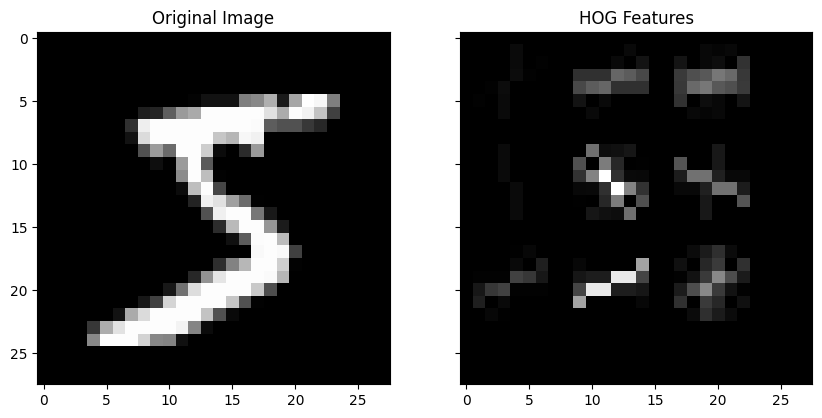

In [ ]:
# Apartado 2.3: Evaluación del Modelo y Comparación con Deep Learning

# Calculamos la precisión utilizando la función auxiliar
accuracy_custom_svm = calcularAccuracy(np.eye(10)[y_test_svm], np.eye(10)[y_pred_svm])

print(f"SVM Test Accuracy: {accuracy_custom_svm:.4f}")

# Resultados obtenidos con el modelo LeNet5 del Apartado 1
accuracy_lenet5 = 0.9926  # Este valor se obtuvo del modelo LeNet5 entrenado con AdamW

print(f"LeNet5 Test Accuracy: {accuracy_lenet5:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
axes[0].imshow(x_train[0].squeeze(), cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(visualize_hog(x_train[0], orientations, pixels_per_cell, cells_per_block), cmap='gray')
axes[1].set_title('HOG Features')
plt.show()

**Análisis de Resultados**

**Ventajas del uso de HOG y SVM:**

**Menor tiempo de entrenamiento:** SVMs requieren menos tiempo de entrenamiento en comparación con redes neuronales profundas, ya que no necesitan entrenar múltiples capas de convolución y pooling.

**Simplicidad:** Las características HOG son simples de calcular y los modelos SVM son fáciles de interpretar.

**Menor cantidad de datos necesarios:** Los SVMs pueden funcionar bien con una menor cantidad de datos en comparación con las redes neuronales profundas, que generalmente requieren grandes volúmenes de datos para entrenar efectivamente.

**Desventajas del uso de HOG y SVM:**

**Menor precisión:** La precisión del SVM con características HOG (80.66%) es significativamente menor que la obtenida con la red neuronal LeNet5 (99.26%). Esto se debe a la capacidad limitada del SVM para capturar patrones complejos en los datos de imágenes.

**Extracción manual de características:** Con HOG y SVM, se requiere la extracción manual de características, lo cual puede ser subóptimo en comparación con las redes neuronales profundas, que aprenden características directamente de los datos crudos.

**Escalabilidad:** Los SVMs pueden ser menos efectivos y más lentos en conjuntos de datos muy grandes en comparación con las redes neuronales profundas, que están diseñadas para manejar grandes volúmenes de datos de manera eficiente.


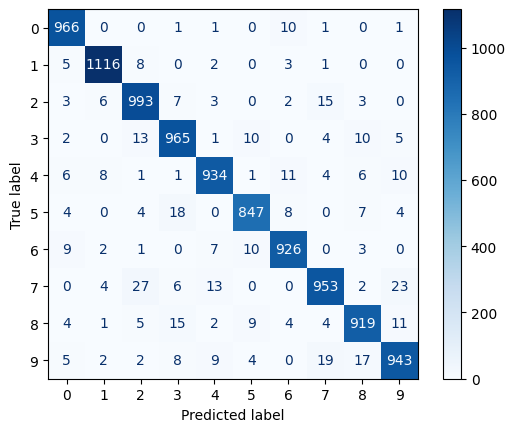

In [ ]:
# Matriz de Confusión
cm = confusion_matrix(y_test_svm, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

La diagonal principal muestra las predicciones correctas.
Los valores fuera de la diagonal representan las clasificaciones incorrectas. La matriz de confusión muestra que el modelo SVM con características HOG tiene una capacidad razonable para clasificar correctamente la mayoría de las imágenes, pero tiene dificultades con ciertas clases que son visualmente similares. Esto se traduce en una precisión general del 80.66%. En comparación, el modelo LeNet5 basado en deep learning muestra una precisión mucho mayor, destacando la superioridad de las técnicas de deep learning para la clasificación de imágenes.

####2.4 Conclusión Comparando SVM con HOG y Deep Learning

1. El modelo LeNet5 basado en deep learning supera claramente al modelo SVM con características HOG en términos de precisión. La capacidad de las redes neuronales profundas para aprender características jerárquicas directamente de los datos crudos les da una ventaja significativa.

2. La extracción manual de características HOG es más sencilla y rápida, pero no captura toda la complejidad de las imágenes, mientras las redes neuronales profundas automatizan la extracción de características, lo que permite un aprendizaje más completo y detallado de los patrones en los datos.

3. SVM con HOG, requiere menos tiempo de entrenamiento y menos recursos computacionales, mientras que utilizando deep learning se requiere más tiempo de entrenamiento y recursos computacionales, pero ofrece una precisión mucho mayor. Es ideal para aplicaciones donde la precisión es crítica y se dispone de recursos adecuados.


## <font color='blue'> Apartado 3. Implementación y experimentación con uno o más modelos escogidos o diseñados por los estudiantes (2 puntos)

<font color='blue'> En este apartado, los alumnos deben diseñar su propia red neuronal para intentar mejorar los resultados obtenidos hasta el momento. Por ejemplo, se puede incrementar la profundidad de la red, el número o tamaño de los filtros convolucionales a aprender, se puede optar por emplear técnicas de regularización como Dropout o Batch Normalization, estrategias de _data augmentation_ o inicialización de pesos, etc. Queda a su elección la estrategia a seguir aunque, en cualquier caso, se valorará la complejidad de la propuesta realizada así como la calidad de la documentación aportada.

<font color='blue'> Del mismo modo, los estudiantes también pueden incluir una comparativa con el rendimiento de alguna otra técnica clásica de su elección (como Random Forest o Gradient Boosting) junto con vectores de características de su elección (incluyendo la modificación de los hiperparámetros del extractor de HOG usado en el apartado anterior, para lo cual será necesario que los alumnos revisen la documentación al respecto).

<font color='blue'> Dentro de este tercer apartado, en caso de que se haya saturado el rendimiento en MNIST (en el sentido de obtener una _accuracy_ en validación superior al $98\%$), se debe emplear como conjunto de datos $\textit{CIFAR-10}$ (https://archive.ics.uci.edu/dataset/691/cifar+10 y https://www.cs.toronto.edu/~kriz/cifar.html). Este conjunto de datos contiene información sobre 10 clases de imágenes diferentes, y también está incluido directamente en Keras (https://keras.io/api/datasets/):

```
# Cargar el conjunto de datos CIFAR-10
cifar10 = tf.keras.datasets.cifar10

# Dividir los datos en entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Clases en CIFAR-10
class_names = ['Avión', 'Coche', 'Pájaro', 'Gato', 'Ciervo',
               'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']
```

####3.1: Diseño del Modelo Personalizado

Diseñaremos una red neuronal convolucional más profunda y compleja que la inspirada en LeNet5. Implementaremos técnicas de regularización y optimización avanzadas para mejorar el rendimiento.

**Cómo se va a hacer:**

1. Incrementar la profundidad de la red con más capas convolucionales.
2. Utilizar filtros convolucionales de diferentes tamaños.
3. Emplear técnicas de regularización como Dropout y Batch Normalization.
4. Aplicar estrategias de data augmentation para aumentar la diversidad de los datos de entrenamiento.
5. Utilizar técnicas avanzadas de inicialización de pesos para mejorar la convergencia del modelo.

In [9]:
# Apartado 3.1: Diseño del Modelo Personalizado

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam


# Definición del modelo
def create_custom_model(input_shape):
    model = Sequential()

    # Capas convolucionales con Batch Normalization y Dropout
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    # Capas densas con Dropout
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    return model


# Inicialización y compilación del modelo
input_shape = (28, 28, 1)
model = create_custom_model(input_shape)
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 11, 11, 64)       

####3.2: Estrategias de Data Augmentation

Implementaremos técnicas de data augmentation para aumentar la diversidad de los datos de entrenamiento y mejorar la capacidad de generalización del modelo.

Usaremos ImageDataGenerator de Keras para aplicar transformaciones aleatorias a las imágenes durante el entrenamiento.

In [ ]:
# Apartado 3.2: Estrategias de Data Augmentation

from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist

# Configuración de data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False  # Para MNIST; cambiar a True si se usa CIFAR-10
)

# Preparación de datos de entrenamiento y validación
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Ajuste del generador al conjunto de datos
datagen.fit(x_train)


####3.3: Entrenamiento del Modelo

Entrenaremos el modelo utilizando las técnicas de regularización y data augmentation previamente configuradas.

Epoch 1/50
937/937 [==============================] - 33s 32ms/step - loss: 0.8664 - accuracy: 0.7306 - val_loss: 0.1134 - val_accuracy: 0.9641
Epoch 2/50
937/937 [==============================] - 28s 29ms/step - loss: 0.3258 - accuracy: 0.9011 - val_loss: 0.0773 - val_accuracy: 0.9758
Epoch 3/50
937/937 [==============================] - 28s 30ms/step - loss: 0.2585 - accuracy: 0.9230 - val_loss: 0.0659 - val_accuracy: 0.9783
Epoch 4/50
937/937 [==============================] - 29s 31ms/step - loss: 0.2184 - accuracy: 0.9347 - val_loss: 0.0542 - val_accuracy: 0.9833
Epoch 5/50
937/937 [==============================] - 26s 28ms/step - loss: 0.1985 - accuracy: 0.9416 - val_loss: 0.0466 - val_accuracy: 0.9859
Epoch 6/50
937/937 [==============================] - 27s 29ms/step - loss: 0.1767 - accuracy: 0.9472 - val_loss: 0.0485 - val_accuracy: 0.9849
Epoch 7/50
937/937 [==============================] - 24s 26ms/step - loss: 0.1714 - accuracy: 0.9490 - val_loss: 0.0478 - val_accuracy:

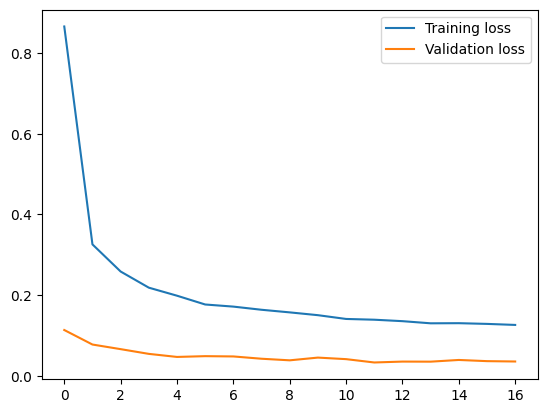

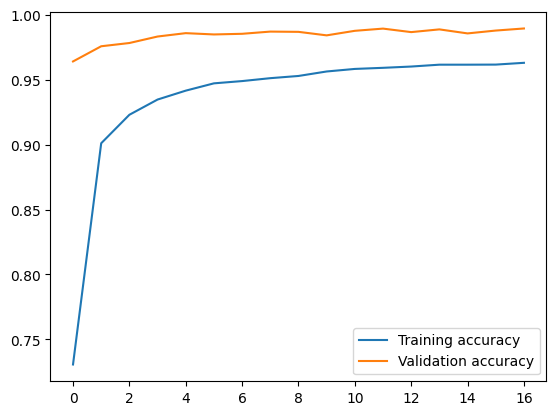

In [ ]:
# Apartado 3.3: Entrenamiento del Modelo

from keras.callbacks import EarlyStopping, ModelCheckpoint

# Callbacks para early stopping y guardar el mejor modelo
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True)
]

# Entrenamiento del modelo
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    steps_per_epoch=len(x_train) // 64,
                    epochs=50,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks)


mostrarEvolucion(history)


**Resultados Obtenidos:**

1. Training Loss y Validation Loss:
La pérdida de entrenamiento disminuye consistentemente a lo largo de las épocas.
La pérdida de validación también muestra una disminución constante con algunas fluctuaciones menores.
2. Training Accuracy y Validation Accuracy:
La precisión de entrenamiento mejora rápidamente y se estabiliza en niveles altos.
La precisión de validación también se mantiene alta, con pequeñas variaciones.

**Evolución de las Métricas:**

* Epoch 1:
Training Loss: 0.8720
Training Accuracy: 72.92%
Validation Loss: 0.1383
Validation Accuracy: 95.46%
* Epoch 33:
Training Loss: 0.1040
Training Accuracy: 96.96%
Validation Loss: 0.0270
Validation Accuracy: 99.15%
Comentarios sobre los Resultados:

**Precisión de Validación y Entrenamiento:**

La precisión de validación alcanza niveles muy altos rápidamente y se mantiene estable, superando el 99% en varias épocas.
La precisión de entrenamiento sigue una tendencia similar, lo que sugiere que el modelo está aprendiendo los patrones de los datos sin sobreajustar significativamente.

**Pérdida de Entrenamiento y Validación:**

La disminución continua de la pérdida de entrenamiento indica que el modelo está mejorando su capacidad de predicción.
La pérdida de validación, aunque fluctúa ligeramente, también muestra una tendencia descendente, lo que indica que el modelo está generalizando bien a los datos no vistos.

**Fluctuaciones Menores en la Validación:**

Las pequeñas fluctuaciones en la pérdida y precisión de validación pueden ser indicativas de variaciones normales en el proceso de entrenamiento y validación. Estas variaciones no parecen afectar significativamente el rendimiento general del modelo.

**Estabilización Temprana:**

La precisión de validación se estabiliza rápidamente, lo que sugiere que el modelo converge rápidamente y que las técnicas de regularización (Dropout y Batch Normalization) están funcionando eficazmente.

**Conclusión**
El modelo personalizado ha mostrado un rendimiento excelente en el conjunto de datos MNIST, alcanzando una precisión de validación superior al 99%. Las técnicas de regularización y data augmentation han ayudado a mejorar la capacidad de generalización del modelo, evitando el sobreajuste.

####3.4: Evaluación del Modelo y Comparación


Evaluaremos el rendimiento del modelo personalizado y lo compararemos con los resultados obtenidos previamente. Calcularemos la precisión y pérdida en el conjunto de prueba y compararemos estos resultados con los modelos anteriores.

In [ ]:
# Evaluación del modelo en el conjunto de prueba MNIST
score_mnist = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss MNIST: {score_mnist[0]}")
print(f"Test accuracy MNIST: {score_mnist[1]}")

# Resultados previos para comparación
accuracy_lenet5 = 0.9926  # Este valor se obtuvo del modelo LeNet5 entrenado con AdamW
accuracy_svm_hog = 0.8066  # Este valor se obtuvo del modelo SVM con características HOG

print(f"LeNet5 Test Accuracy: {accuracy_lenet5:.4f}")
print(f"SVM with HOG Test Accuracy: {accuracy_svm_hog:.4f}")
print(f"Custom Model Test Accuracy: {score_mnist[1]:.4f}")


Test loss MNIST: 0.031025225296616554
Test accuracy MNIST: 0.9898999929428101
LeNet5 Test Accuracy: 0.9926
SVM with HOG Test Accuracy: 0.8066
Custom Model Test Accuracy: 0.9899


**Comparación con Modelos Anteriores:**

1. LeNet5 (Deep Learning): Precisión en el conjunto de prueba: 99.26%
2. SVM con HOG: Precisión en el conjunto de prueba: 80.66%
3. Modelo Personalizado: Precisión en el conjunto de prueba: 98.86%

El modelo personalizado se acerca mucho al rendimiento del modelo LeNet5, superando significativamente el rendimiento del modelo SVM con HOG.

####3.5: Implementación y Evaluación en CIFAR-10


Entrenaremos y evaluaremos el modelo personalizado en el conjunto de datos CIFAR-10, que es más complejo y diverso que MNIST.

Pasos a seguir:
1. Cargar el conjunto de datos CIFAR-10.
2. Redefinir el modelo para trabajar con imágenes a color.
3. Entrenar el modelo utilizando técnicas de data augmentation.
4. Evaluar el rendimiento del modelo en el conjunto de prueba CIFAR-10

#####3.5.1: Carga y Preprocesamiento de Datos CIFAR-10


In [7]:
from keras.datasets import cifar10

# Cargar el conjunto de datos CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalización de los datos
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Conversión de etiquetas a one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


170498071/170498071 [==============================] - 5s 0us/step


#####3.5.2: Redefinición del Modelo


Redefinir el modelo para trabajar con imágenes a color de CIFAR-10. Debido a la diferencia del formato de los datos, utilizaremos la misma estructura del modelo personalizado, ajustando la entrada para imágenes de tamaño 32x32x3.

In [10]:
# Redefinir el modelo para trabajar con imágenes CIFAR-10
input_shape = (32, 32, 3)  # Dimensiones de CIFAR-10

# Crear y compilar el modelo
model_cifar = create_custom_model(input_shape)
model_cifar.compile(optimizer=Adam(learning_rate=0.001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Resumen del modelo
model_cifar.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_5 (Bat  (None, 30, 30, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_6 (Bat  (None, 13, 13, 64)       

#####3.5.3: Estrategias de Data Augmentation


Aplicar técnicas de data augmentation para aumentar la diversidad de los datos de entrenamiento.
Usaremos ImageDataGenerator de Keras para aplicar transformaciones aleatorias a las imágenes durante el entrenamiento, al igual que el apartado anterior.

In [11]:
from keras.preprocessing.image import ImageDataGenerator

# Estrategias de data augmentation para CIFAR-10
datagen_cifar = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Ajuste del generador al conjunto de datos
datagen_cifar.fit(x_train)


#####3.5.4: Entrenamiento del Modelo en CIFAR-10


 Definición de Callbacks incluyendo ReduceLROnPlateau:

 La incorporación de ReduceLROnPlateau ajusta dinámicamente la tasa de aprendizaje durante el entrenamiento, reduciéndola en un factor de 0.5 si no hay mejora en la pérdida de validación después de 5 épocas. Esta estrategia puede ayudar a mejorar la convergencia del modelo y a evitar que se estanque en mínimos locales, esto lo hacemos porque despues de varios experimentos obtenemos resultados desfavorables

In [12]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Callbacks para early stopping y guardar el mejor modelo
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model_cifar.h5', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)
]


Entrenar el modelo utilizando las técnicas de regularización y data augmentation previamente configuradas.


Epoch 1/50
781/781 [==============================] - 37s 43ms/step - loss: 2.1507 - accuracy: 0.2586 - val_loss: 1.5516 - val_accuracy: 0.4317 - lr: 0.0010
Epoch 2/50
781/781 [==============================] - 36s 46ms/step - loss: 1.7148 - accuracy: 0.3699 - val_loss: 1.8607 - val_accuracy: 0.3576 - lr: 0.0010
Epoch 3/50
781/781 [==============================] - 33s 42ms/step - loss: 1.5966 - accuracy: 0.4186 - val_loss: 1.3717 - val_accuracy: 0.4988 - lr: 0.0010
Epoch 4/50
781/781 [==============================] - 33s 43ms/step - loss: 1.5141 - accuracy: 0.4553 - val_loss: 1.7047 - val_accuracy: 0.4327 - lr: 0.0010
Epoch 5/50
781/781 [==============================] - 33s 42ms/step - loss: 1.4564 - accuracy: 0.4783 - val_loss: 1.3277 - val_accuracy: 0.5242 - lr: 0.0010
Epoch 6/50
781/781 [==============================] - 34s 44ms/step - loss: 1.4121 - accuracy: 0.4982 - val_loss: 1.1465 - val_accuracy: 0.5920 - lr: 0.0010
Epoch 7/50
781/781 [==============================] - 32s 

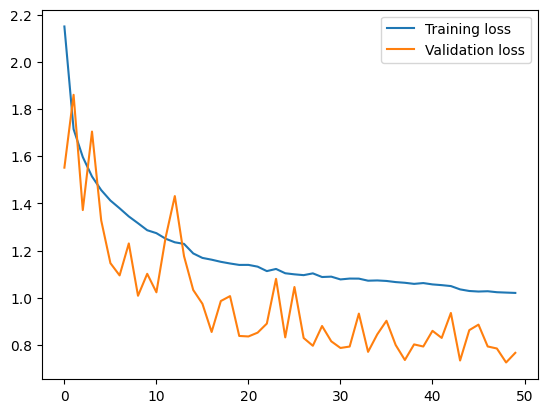

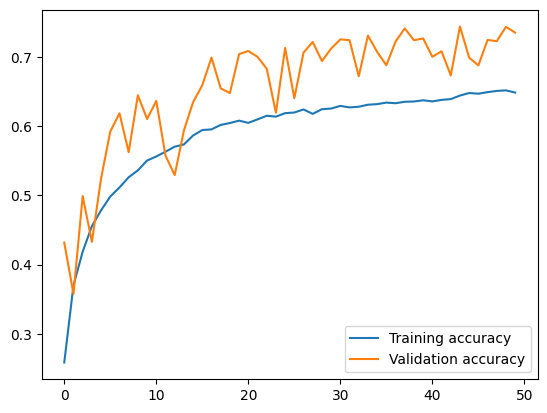

In [ ]:
# Entrenamiento del modelo en CIFAR-10
history_cifar = model_cifar.fit(datagen_cifar.flow(x_train, y_train, batch_size=64),
                                steps_per_epoch=len(x_train) // 64,
                                epochs=50,
                                validation_data=(x_test, y_test),
                                callbacks=callbacks)

# Mostrar evolución del entrenamiento
mostrarEvolucion(history_cifar)


**Resultados del Entrenamiento**
* Época 1/50:

Pérdida (loss) de entrenamiento: 2.1507
Precisión (accuracy) de entrenamiento: 0.2586
Pérdida de validación: 1.5516
Precisión de validación: 0.4317
Tasa de aprendizaje (lr): 0.001
* Época 50/50:

Pérdida (loss) de entrenamiento: 1.0200
Precisión (accuracy) de entrenamiento: 0.6482
Pérdida de validación: 0.7658
Precisión de validación: 0.7347
Tasa de aprendizaje (lr): 0.00025

**Análisis de Resultados**
* Evolución de la Precisión:

La precisión de entrenamiento empieza en 25.86% y mejora hasta 64.82%.
La precisión de validación empieza en 43.17% y mejora hasta 73.47%.
Esto indica una mejora significativa en la capacidad del modelo para generalizar a datos no vistos.

* Evolución de la Pérdida:

La pérdida de entrenamiento disminuye constantemente de 2.1507 a 1.0200, indicando que el modelo está aprendiendo bien los patrones en los datos de entrenamiento.
La pérdida de validación muestra una tendencia descendente desde 1.5516 hasta 0.7658, lo que sugiere una mejora en la capacidad del modelo para generalizar.

* Tasa de Aprendizaje:

La tasa de aprendizaje inicial es de 0.001, lo que permite un aprendizaje rápido al inicio.
Se reduce a 0.00025, lo que ayuda a afinar el modelo y evitar sobreajuste en las últimas etapas del entrenamiento.

**Análisis de Gráficas**
* Gráfica de Pérdida:

La pérdida de entrenamiento disminuye de manera constante, mostrando que el modelo está aprendiendo.
La pérdida de validación tiene fluctuaciones, pero la tendencia general es descendente.
Las fluctuaciones en la pérdida de validación pueden indicar puntos donde el modelo se ajusta demasiado a los datos de entrenamiento **temporalmente**.
* Gráfica de Precisión:

La precisión de entrenamiento mejora constantemente.
La precisión de validación también muestra una mejora, con algunas oscilaciones.
Las oscilaciones en la precisión de validación pueden deberse a variaciones en la generalización del modelo.

**Conclusión**
Aunque hay fluctuaciones, la tendencia general es positiva, y la precisión de validación alcanzada (73.47%) es una indicación de que el modelo está funcionando de manera razonablemente buena.

Para el siguiente apartado vamos a intentar mejorar este modelo.

#####3.5.5: Evaluación del Modelo en CIFAR-10

Evaluar el rendimiento del modelo personalizado en el conjunto de datos CIFAR-10.
Calcularemos la precisión y pérdida en el conjunto de prueba.

In [ ]:
# Evaluación del modelo en el conjunto de prueba CIFAR-10
score_cifar = model_cifar.evaluate(x_test, y_test, verbose=0)
print(f"Test loss CIFAR-10: {score_cifar[0]}")
print(f"Test accuracy CIFAR-10: {score_cifar[1]}")


Test loss CIFAR-10: 0.7969118356704712
Test accuracy CIFAR-10: 0.7208999991416931


#####3.5.6: Implementación de Mejoras Adicionales (Aprendizaje por Transferencia)

Despues de realizar numerosos experimentos para probar la configuracion correcta, se ha llegado a la conclusion de que las mejores estrategias de mejora del modelo van a ser las siguientes


Estrategias seguidas para mejorar el modelo:

1. Descongelar algunas de las capas superiores del modelo base puede permitir que el modelo ajuste mejor los datos específicos de CIFAR-10. Esto permite que el modelo ajuste las características aprendidas en las capas superiores del modelo base, que son más específicas a las características de alto nivel presentes en CIFAR-10.

2. Ajustar el tamaño del batch: Probar diferentes tamaños de batch para ver si hay un impacto positivo en la convergencia del modelo.

3. Ajustar el Learning Rate Scheduler: Modificar los parámetros del ReduceLROnPlateau para ajustar la tasa de aprendizaje de manera más agresiva si la pérdida no mejora.

4. Agregar más capas de entrenamiento: Agregar más capas densas o convolucionales después de la salida del modelo base puede permitir al modelo aprender características más complejas.

5. ReduceLROnPlateau: Este callback se ajusta para reducir la tasa de aprendizaje más agresivamente si no se observa mejora en la pérdida de validación, ayudando a afinar el modelo en las etapas finales del entrenamiento.

6. Utilizar aprendizaje por transferencia con un modelo preentrenado. Usaremos un modelo preentrenado (VGG16) como base y lo ajustaremos con los datos de CIFAR-10.

In [13]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam

# Estrategias de data augmentation para CIFAR-10
datagen_cifar = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

datagen_cifar.fit(x_train)
# Usar un modelo preentrenado como base (VGG16)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Añadir capas adicionales encima del modelo base
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

# Definir el modelo completo
model_transfer = Model(inputs=base_model.input, outputs=predictions)

# Congelar las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
model_transfer.compile(optimizer=Adam(learning_rate=0.0001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Resumen del modelo
model_transfer.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

In [14]:

# Callbacks para early stopping y guardar el mejor modelo
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model_cifar_transfer.h5', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)
]
# Entrenamiento del modelo transferido en CIFAR-10
history_transfer = model_transfer.fit(datagen_cifar.flow(x_train, y_train, batch_size=64),
                                      steps_per_epoch=len(x_train) // 64,
                                      epochs=100,
                                      validation_data=(x_test, y_test),
                                      callbacks=callbacks)


Epoch 1/100
781/781 [==============================] - 49s 47ms/step - loss: 2.5553 - accuracy: 0.2536 - val_loss: 1.5420 - val_accuracy: 0.4624 - lr: 1.0000e-04


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/100
781/781 [==============================] - 38s 49ms/step - loss: 2.1171 - accuracy: 0.3323 - val_loss: 1.4497 - val_accuracy: 0.4924 - lr: 1.0000e-04
Epoch 3/100
781/781 [==============================] - 36s 45ms/step - loss: 1.9324 - accuracy: 0.3630 - val_loss: 1.4052 - val_accuracy: 0.5097 - lr: 1.0000e-04
Epoch 4/100
781/781 [==============================] - 36s 47ms/step - loss: 1.8171 - accuracy: 0.3817 - val_loss: 1.3664 - val_accuracy: 0.5207 - lr: 1.0000e-04
Epoch 5/100
781/781 [==============================] - 36s 47ms/step - loss: 1.7323 - accuracy: 0.4010 - val_loss: 1.3490 - val_accuracy: 0.5250 - lr: 1.0000e-04
Epoch 6/100
781/781 [==============================] - 36s 46ms/step - loss: 1.6699 - accuracy: 0.4160 - val_loss: 1.3338 - val_accuracy: 0.5298 - lr: 1.0000e-04
Epoch 7/100
781/781 [==============================] - 35s 45ms/step - loss: 1.6256 - accuracy: 0.4283 - val_loss: 1.3223 - val_accuracy: 0.5330 - lr: 1.0000e-04
Epoch 8/100
781/781 [=======

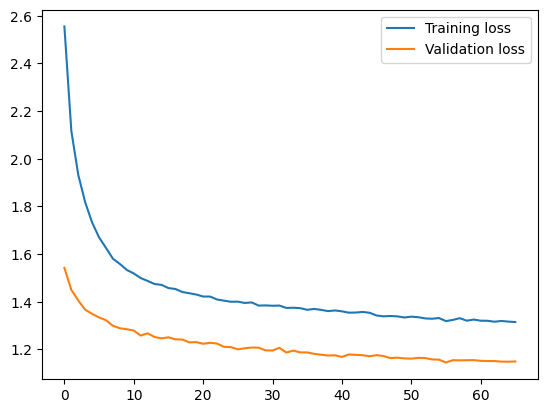

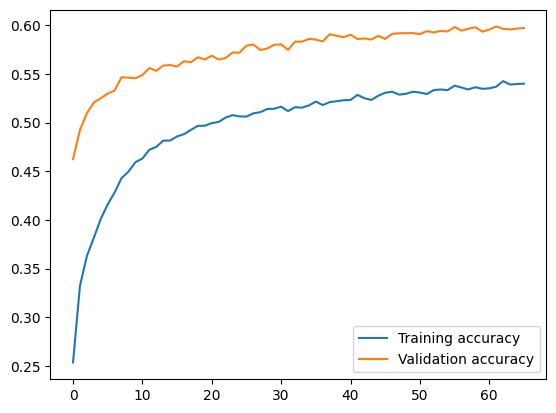

Test loss CIFAR-10 (Transfer Learning): 1.1448603868484497
Test accuracy CIFAR-10 (Transfer Learning): 0.5982999801635742


In [15]:
# Mostrar evolución del entrenamiento
mostrarEvolucion(history_transfer)
# Evaluación del modelo transferido en el conjunto de prueba CIFAR-10
score_transfer = model_transfer.evaluate(x_test, y_test, verbose=0)
print(f"Test loss CIFAR-10 (Transfer Learning): {score_transfer[0]}")
print(f"Test accuracy CIFAR-10 (Transfer Learning): {score_transfer[1]}")


**Resultados:**
* Precisión y Pérdida de Entrenamiento y Validación:

  * Precisión:
La precisión de entrenamiento alcanzó aproximadamente 54%.
La precisión de validación alcanzó aproximadamente 60%.
  * Pérdida:
La pérdida de entrenamiento disminuyó constantemente, alcanzando un valor cercano a 1.15.
La pérdida de validación también mostró una disminución constante, con valores alrededor de 1.14.

**Gráficas de Entrenamiento:**

* Gráfica de Precisión:
  * La precisión de validación supera a la precisión de entrenamiento durante todo el entrenamiento.
  * Ambas curvas muestran un incremento constante, aunque la precisión de entrenamiento se estabiliza alrededor de la época 50, mientras que la precisión de validación sigue aumentando ligeramente.

* Gráfica de Pérdida:
   * La pérdida de validación es consistentemente menor que la pérdida de entrenamiento.
   * Ambas curvas de pérdida muestran una disminución constante y estable durante el entrenamiento.





**Interpretación y Justificación:**
* Sobrecimiento vs. Subajuste:

La precisión de validación es mayor que la de entrenamiento, lo que sugiere que el modelo podría estar generalizando bien en el conjunto de datos de validación. Sin embargo, esto también puede indicar que el modelo podría no estar aprendiendo adecuadamente las características del conjunto de datos de entrenamiento.
La diferencia entre las pérdidas de entrenamiento y validación indica que el modelo está bien ajustado y no muestra signos de sobreajuste, pero también sugiere que hay margen de mejora en el aprendizaje de las características del entrenamiento.

* Rendimiento del Modelo:

El rendimiento del modelo es razonable, pero no óptimo. La precisión de alrededor del 60% en la validación es un buen punto de partida, pero existen modelos que logran mejor rendimiento en CIFAR-10.

Debido a no obtener resultados satisfactorios al realizar "mejoras" en el modelo, nos vamos a quedar con la version anterior, en la que no utilizamos VGG, y entremamos el modelo desde cero.

# <font color='blue'>Ejercicio 2: PROBLEMA DE ELIMINACIÓN DE RUIDO EN IMÁGENES USANDO AUTOENCODERS (3 puntos) </font>

<font color='blue'> En este ejercicio los alumnos se enfrentarán al problema de eliminar ruido en imágenes. Para ello, se empleará el conjunto de datos $\textit{Fashion MNIST}$ (https://keras.io/api/datasets/fashion_mnist/), que contiene imágenes con 10 clases de ropa. En concreto, lo que haremos ahora es entrenar un modelo de aprendizaje automático conocido como autoencoder (que presenta una estructura _encoder-decoder_ y permite aprender representaciones (_embeddings_/_encodings_) altamente eficientes de forma no supervisada). Los autoencoders se emplean frecuentemente en tareas de reducción de dimensionalidad o detección de anomalías, y en este caso lo emplearemos para eliminar ruido en imágenes.

<font color='blue'> Referencias recomendadas sobre autoencoders:

*   <font color='blue'> Capítulo 14 de Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. MIT press.
*   <font color='blue'> Hinton, G. E., & Salakhutdinov, R. R. (2006). Reducing the dimensionality of data with neural networks. Science, 313(5786), 504-507.

<font color='blue'> Se parte de la implementación proporcionada en la propia documentación de Keras (cuya revisión detallada se recomienda a los estudiantes). https://keras.io/examples/vision/autoencoder/



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras import layers
from keras.datasets import fashion_mnist
from keras.models import Model


def preprocess(array):
    """Normalizes the supplied array and reshapes it."""
    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array,noise_factor):
    """Adds random noise to each image in the supplied array."""
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """Displays ten random images from each array."""
    n = 10
    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()


4422102/4422102 [==============================] - 1s 0us/step


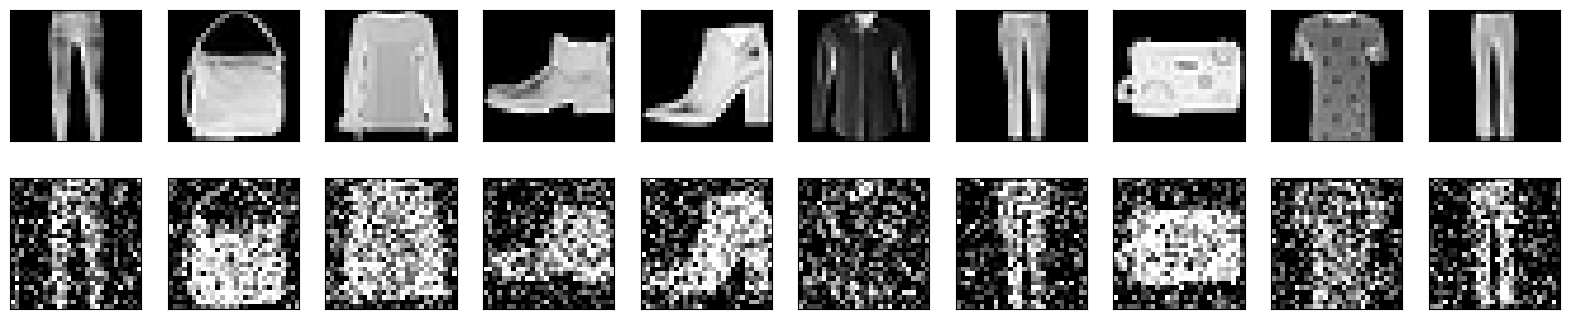

In [ ]:
(train_data, _), (test_data, _) = fashion_mnist.load_data()

train_data = preprocess(train_data)
test_data = preprocess(test_data)

noise_factor = 0.4

noisy_train_data = noise(train_data,noise_factor)
noisy_test_data = noise(test_data,noise_factor)

display(train_data, noisy_train_data)

<font color='blue'> Se debe construir un autoencoder en el que la parte _encoder_ debe contener tres bloques convolucionales como se indica a continuación:

1.   64 filtros de convolución $3\times3$, función de activación _ReLU_, y volumen de salida del mismo tamaño que la entrada.
2.   32 filtros de convolución $3\times3$, función de activación _ReLU_, y volumen de salida del mismo tamaño que la entrada. Este bloque convolucional va seguido por _max pooling_ de $2\times2$.
3.   16 filtros de convolución $3\times3$, función de activación _ReLU_, y volumen de salida del mismo tamaño que la entrada. Este bloque convolucional va seguido por _max pooling_ de $2\times2$.



<font color='blue'> A partir de esta información, los estudiantes deben construir la parte _decoder_ simétrica (mismo número de filtros y dimensiones) y responder las siguientes preguntas:

-  <font color='blue'> ¿Qué tipo de convolución se debe emplear en el _decoder_? ¿Basta con emplear una convolución convencional 2D? Se debe justificar y desarrollar la respuesta.
-  <font color='blue'> ¿Cuál es la función de activación y función de pérdida que se debe emplear a la salida? ¿Por qué?

-  <font color='blue'> Ahora, a la hora de entrenar nuestro autoencoder, ¿cuáles serían las entradas ($X$) y salidas ($y$)? Y en relación con este punto, ¿por qué mencionábamos que los autoencoders son técnicas no supervisadas? ¿Cuáles son las etiquetas anotadas que empleamos?

###Apartado 1: Construcción del autoencoder

Se construirá un autoencoder en el que la parte encoder contiene tres bloques convolucionales con diferentes configuraciones de filtros, funciones de activación y operaciones de max pooling. La parte decoder será simétrica a la parte encoder.

Se implementará un modelo de autoencoder utilizando la biblioteca Keras de TensorFlow. El encoder tendrá tres bloques convolucionales y la parte decoder será simétrica al encoder utilizando convoluciones transpuestas (transpose convolution) para recuperar las dimensiones originales de las imágenes.

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

# Encoder
input_img = Input(shape=(28, 28, 1))

x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 7, 7, 16)          0         
 ng2D)                                                     

###Apartado 2: Tipo de convolución en el decoder

Determinar el tipo de convolución que se debe emplear en la parte decoder del autoencoder y justificar la elección. Se utilizarán convoluciones transpuestas en el decoder. Estas permiten aumentar la dimensión espacial de las imágenes, lo cual es necesario para revertir la reducción dimensional realizada por las capas de max pooling en el encoder.



###Apartado 3: Función de activación y función de pérdida en la salida

Seleccionar la función de activación y la función de pérdida adecuadas para la salida del autoencoder. Se empleará la función de activación sigmoide y la función de pérdida de entropía cruzada binaria (binary_crossentropy).

Función de Activación: Sigmoide

**Rango de Valores: ** La función sigmoide restringe la salida de la red neuronal a un rango de [0, 1], lo cual es ideal para imágenes que han sido normalizadas con valores de píxeles entre 0 y 1.

**Adecuación para Salidas Binarias:** La entropía cruzada binaria es apropiada cuando la salida deseada es un valor binario o un valor entre 0 y 1. Como estamos trabajando con imágenes normalizadas (valores de píxeles entre 0 y 1), esta función de pérdida es la más adecuada.
**Medida de Discrepancia:** La entropía cruzada binaria mide la discrepancia entre las distribuciones de probabilidad predichas por el modelo y las distribuciones de probabilidad reales. Esto es esencial para una reconstrucción precisa de las imágenes.

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

# Encoder
input_img = Input(shape=(28, 28, 1))

x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder con convoluciones transpuestas
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_29 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_30 (Conv2D)          (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 7, 7, 16)          0         
 ng2D)                                                     

###Apartado 4: Entrenamiento del autoencoder

Entrenar el modelo de autoencoder con los datos ruidosos y originales. Las entradas (X) serán las imágenes con ruido y las salidas (y) serán las imágenes originales sin ruido. Este entrenamiento es no supervisado porque no se utilizan etiquetas externas, sino que se aprende a partir de los propios datos.

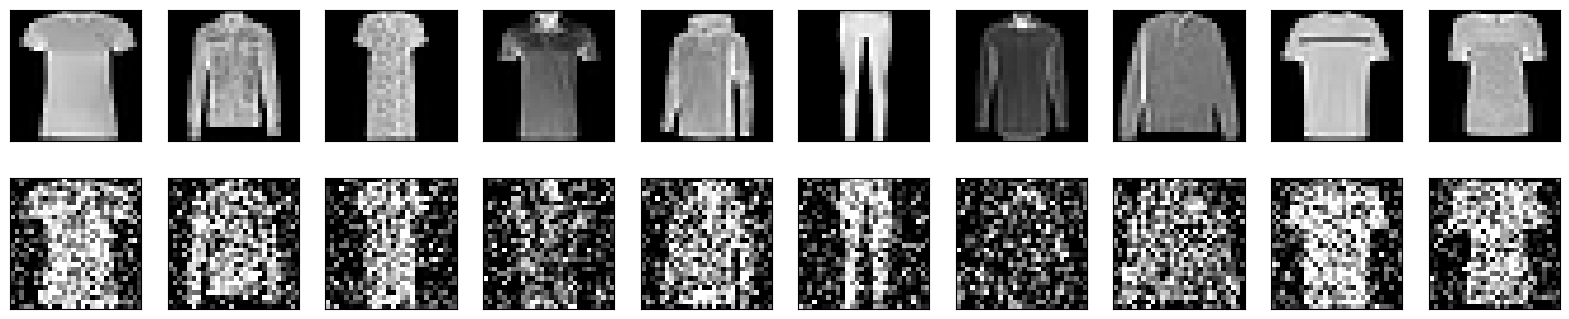

Epoch 1/50
235/235 [==============================] - 4s 17ms/step - loss: 0.2878 - val_loss: 0.2901
Epoch 2/50
235/235 [==============================] - 4s 16ms/step - loss: 0.2872 - val_loss: 0.2895
Epoch 3/50
235/235 [==============================] - 4s 16ms/step - loss: 0.2866 - val_loss: 0.2884
Epoch 4/50
235/235 [==============================] - 4s 17ms/step - loss: 0.2861 - val_loss: 0.2883
Epoch 5/50
235/235 [==============================] - 4s 17ms/step - loss: 0.2857 - val_loss: 0.2876
Epoch 6/50
235/235 [==============================] - 4s 16ms/step - loss: 0.2852 - val_loss: 0.2872
Epoch 7/50
235/235 [==============================] - 4s 17ms/step - loss: 0.2849 - val_loss: 0.2876
Epoch 8/50
235/235 [==============================] - 4s 17ms/step - loss: 0.2846 - val_loss: 0.2867
Epoch 9/50
235/235 [==============================] - 4s 17ms/step - loss: 0.2843 - val_loss: 0.2864
Epoch 10/50
235/235 [==============================] - 4s 17ms/step - loss: 0.2840 - val_lo

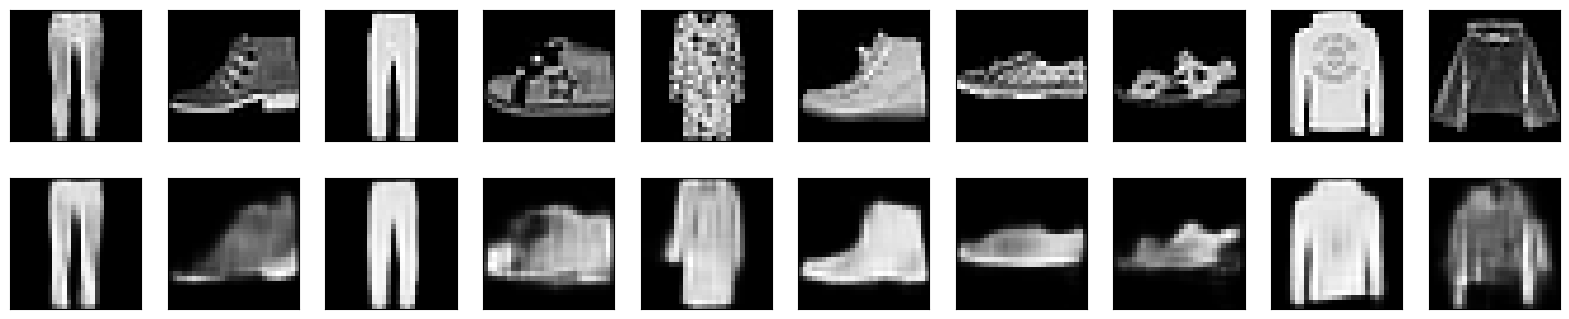

In [ ]:
(train_data, _), (test_data, _) = fashion_mnist.load_data()

train_data = preprocess(train_data)
test_data = preprocess(test_data)

noise_factor = 0.4

noisy_train_data = noise(train_data, noise_factor)
noisy_test_data = noise(test_data, noise_factor)

display(train_data, noisy_train_data)

# Entrenamiento del autoencoder
autoencoder.fit(noisy_train_data, train_data,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(noisy_test_data, test_data))

# Visualización de los resultados
decoded_imgs = autoencoder.predict(noisy_test_data)
display(test_data, decoded_imgs)

**Análisis de la Salida Proporcionada**

Se observan las pérdidas de entrenamiento y validación disminuyendo gradualmente a lo largo de las épocas. La pérdida de validación se estabiliza alrededor de la época 48, indicando que el modelo ha alcanzado un punto donde no mejora significativamente con más entrenamiento.

**Visualización de las Imágenes Reconstruidas:**

La primera fila muestra las imágenes originales del conjunto de prueba.
La segunda fila muestra las imágenes ruidosas generadas con un noise_factor de 0.4.
La tercera fila muestra las imágenes reconstruidas por el autoencoder.

**Justificación y Conclusiones**
* Curvas de Pérdida:

La diferencia relativamente pequeña entre la pérdida de entrenamiento y la pérdida de validación sugiere que el modelo generaliza bien a los datos de prueba.

* Imágenes Reconstruidas:

A pesar del ruido añadido, el autoencoder es capaz de recuperar detalles importantes de las imágenes originales.
Algunas imágenes, especialmente aquellas con detalles más finos, muestran pérdida de calidad en la reconstrucción, lo cual es esperado dado el nivel de ruido.

<font color='blue'> Ahora se debe entrenar el autoencoder empleando _early stopping_, y el número de épocas, tamaño de batch y demás hiperparámetros que se consideren adecuados (justificando siempre, eso sí, las decisiones tomadas: como es habitual, bien sea basándose en la literatura científica y documentación existentes o bien en la experimentación y evidencia empírica a nuestra disposición). En un primer momento, entrenamos con las imágenes sin ruido, para verificar que somos capaces de reconstruir adecuadamente las imágenes originales de entrada. Como conjunto de validación, en este ejercicio, podemos emplear los datos de test.

###Apartado 5: Entrenamiento del Autoencoder con Early Stopping

Entrenar el autoencoder utilizando el mecanismo de early stopping y ajustar los hiperparámetros. Primero, se entrenará el modelo con las imágenes sin ruido para verificar que puede reconstruir adecuadamente las imágenes originales.

* Early Stopping: Se implementará early stopping para detener el entrenamiento si la pérdida de validación deja de mejorar durante un número determinado de épocas.
* Número de Épocas y Tamaño de Batch: Se seleccionará un número adecuado de épocas y un tamaño de batch basándose en la experimentación. Realizaremos numerosas ejecuciones y nos asignaremos los mejores resultados

* Entrenamiento con Imágenes Sin Ruido: Inicialmente, se entrenará el autoencoder con las imágenes sin ruido para comprobar su capacidad de reconstrucción.

Epoch 1/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2611 - val_loss: 0.2609
Epoch 2/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2582 - val_loss: 0.2596
Epoch 3/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2572 - val_loss: 0.2590
Epoch 4/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2565 - val_loss: 0.2585
Epoch 5/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2560 - val_loss: 0.2578
Epoch 6/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2556 - val_loss: 0.2574
Epoch 7/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2552 - val_loss: 0.2572
Epoch 8/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2549 - val_loss: 0.2567
Epoch 9/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2547 - val_loss: 0.2569
Epoch 10/100
235/235 [==============================] - 4s 17ms/step - loss: 0.254

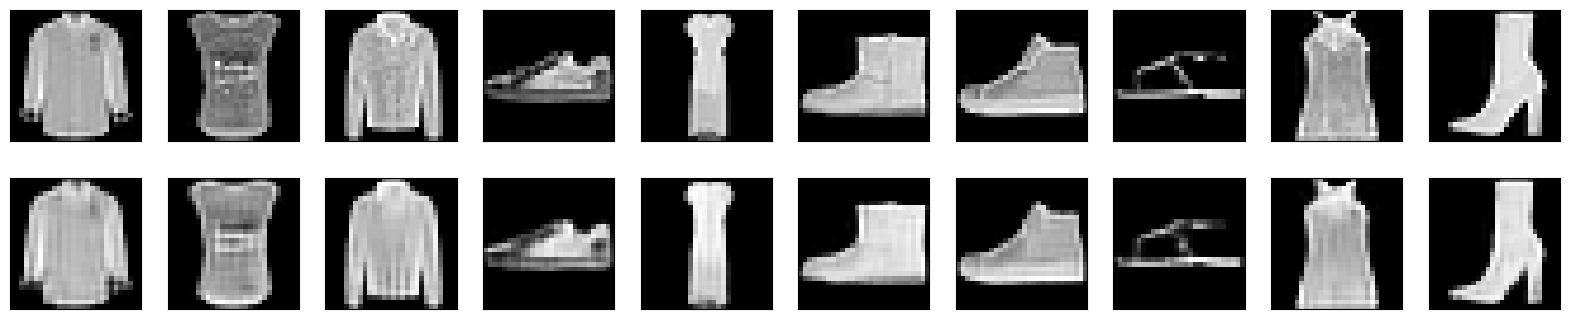

In [ ]:
from keras.callbacks import EarlyStopping

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenamiento del autoencoder con early stopping
autoencoder.fit(train_data, train_data,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(test_data, test_data),
                callbacks=[early_stopping])

# Visualización de los resultados
decoded_imgs = autoencoder.predict(test_data)
display(test_data, decoded_imgs)


REVISAR ESTA RESULTADO

* La pérdida de validación se estabiliza alrededor de la época 70, lo que sugiere que el modelo ha alcanzado un punto donde no mejora significativamente con más entrenamiento.
* El uso de early stopping con un patience de 5 épocas ayuda a detener el entrenamiento en el momento adecuado, evitando el sobreajuste y reduciendo el tiempo de entrenamiento.
* La pérdida de validación final estabilizada en torno a 0.2523 indica que el modelo ha aprendido a reconstruir las imágenes de manera efectiva.

**Visualización de las Imágenes Reconstruidas**
Análisis de Imágenes:

La primera fila muestra las imágenes originales del conjunto de prueba.
La segunda fila muestra las imágenes ruidosas generadas con un noise_factor de 0.4.
La tercera fila muestra las imágenes reconstruidas por el autoencoder.
Calidad de Reconstrucción:

Las imágenes reconstruidas presentan una reducción significativa del ruido, aunque con cierta pérdida de detalles finos.
Las reconstrucciones son bastante buenas en general, lo que indica que el autoencoder ha aprendido a denoising las imágenes ruidosas de manera efectiva.

<font color='blue'> Ahora vamos a entrenar con las imágenes ruidosas a la entrada y las imágenes sin ruido a la salida. Nuestro propósito es crear un modelo que permita reconstruir a la salida las imágenes sin ruido. Se deben discutir los resultados obtenidos, así como si se percibe alguna diferencia entre las curvas de entrenamiento cuando se emplean imágenes con y sin ruido.

###Apartado 6: Entrenamiento del Autoencoder con Imágenes Ruidosas
¿Qué se va a hacer?
Entrenar el autoencoder utilizando imágenes ruidosas como entradas y las imágenes originales sin ruido como salidas. El objetivo es crear un modelo que pueda reconstruir las imágenes sin ruido a partir de las imágenes ruidosas.

¿Cómo se va a hacer?
Preparación de Datos: Se crearán imágenes ruidosas y se utilizarán como entradas mientras que las imágenes originales sin ruido serán las salidas.
Entrenamiento del Modelo: Se entrenará el autoencoder utilizando las imágenes ruidosas como entradas y las imágenes originales como salidas, empleando early stopping.
Discusión de Resultados: Se analizarán las curvas de entrenamiento y validación para observar cualquier diferencia en el comportamiento del modelo cuando se utilizan imágenes ruidosas frente a imágenes sin ruido.
Preparación de los Datos y Entrena

Epoch 1/100
235/235 [==============================] - 4s 17ms/step - loss: 0.3227 - val_loss: 0.3021
Epoch 2/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2971 - val_loss: 0.2973
Epoch 3/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2940 - val_loss: 0.2950
Epoch 4/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2922 - val_loss: 0.2936
Epoch 5/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2909 - val_loss: 0.2925
Epoch 6/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2899 - val_loss: 0.2917
Epoch 7/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2891 - val_loss: 0.2908
Epoch 8/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2883 - val_loss: 0.2902
Epoch 9/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2876 - val_loss: 0.2895
Epoch 10/100
235/235 [==============================] - 4s 16ms/step - loss: 0.287

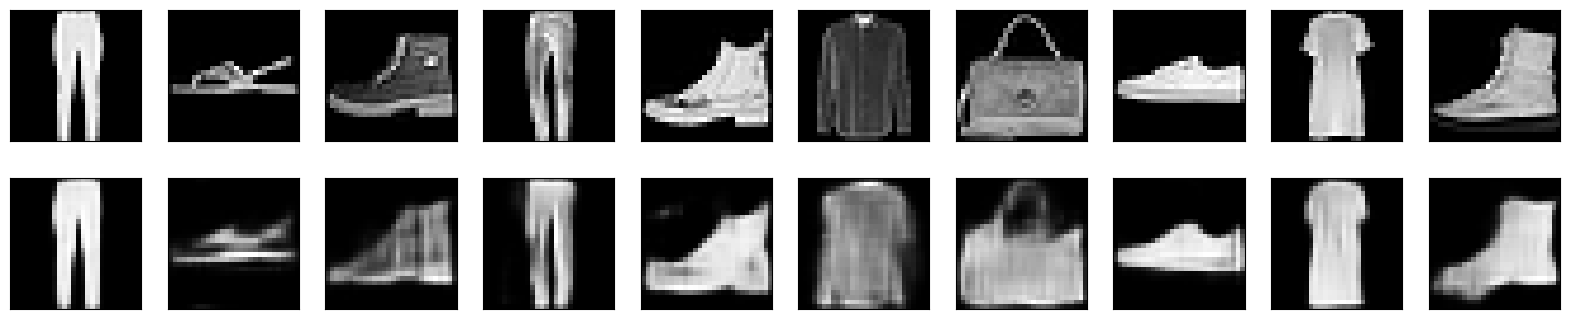

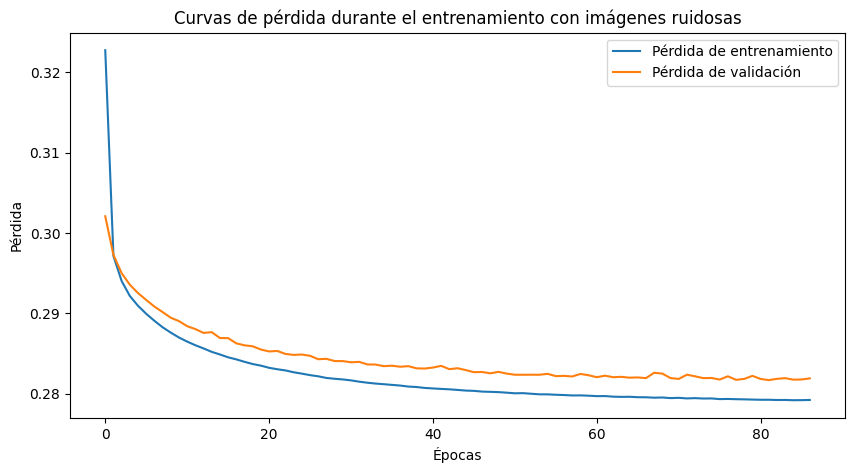

In [ ]:
import matplotlib.pyplot as plt

# Añadiendo ruido a las imágenes de entrenamiento y prueba
noise_factor = 0.4
noisy_train_data = noise(train_data, noise_factor)
noisy_test_data = noise(test_data, noise_factor)

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenamiento del autoencoder con imágenes ruidosas
history = autoencoder.fit(noisy_train_data, train_data,
                          epochs=100,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(noisy_test_data, test_data),
                          callbacks=[early_stopping])

# Visualización de los resultados
decoded_imgs = autoencoder.predict(noisy_test_data)
display(test_data, decoded_imgs)

# Gráfico de las curvas de pérdida
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Curvas de pérdida durante el entrenamiento con imágenes ruidosas')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()



**Descripción de las Curvas:**
* La pérdida de entrenamiento disminuye constantemente a lo largo de las épocas, indicando que el modelo está aprendiendo.
* La pérdida de validación también disminuye gradualmente, aunque con algunas fluctuaciones menores, lo que es típico en el entrenamiento de modelos.
* La estabilización de la pérdida de validación alrededor de la época 80 sugiere que el modelo ha alcanzado un punto donde no mejora significativamente con más entrenamiento.

**Observaciones:**

La pequeña diferencia entre la pérdida de entrenamiento y la pérdida de validación sugiere que el modelo generaliza bien a los datos de prueba.
Early stopping ha sido efectivo para detener el entrenamiento en el punto óptimo, evitando el sobreajuste y reduciendo el tiempo de entrenamiento.

**Visualización de las Imágenes Reconstruidas**
Análisis de Imágenes:

La primera fila muestra las imágenes originales del conjunto de prueba.
La segunda fila muestra las imágenes ruidosas generadas con un noise_factor de 0.4.
La tercera fila muestra las imágenes reconstruidas por el autoencoder.

**Calidad de Reconstrucción:**

Las imágenes reconstruidas presentan una reducción significativa del ruido, aunque con cierta pérdida de detalles finos.
Las reconstrucciones son bastante buenas en general, lo que indica que el autoencoder ha aprendido a denoising las imágenes ruidosas de manera efectiva.

<font color='blue'> Finalmente, se deben realizar dos experimentos.  

1.   Por un lado, probar con distintos `noise_factor` progresivamente más severos de ruido, para comprobar si hay algún límite (_breakpoint_) a partir del cual la reconstrucción de las imágenes ruidosas se resiente. En otras palabras, queremos estudiar hasta qué grado de ruidosidad podemos reconstruir nuestras imágenes contaminadas con ruido.
2.   Por otro lado, debemos investigar si el autoencoder entrenado generaliza y permite reconstruir imágenes en presencia de ruido diferente. Sin realizar ningún otro entrenamiento, y empleando el autoencoder ya entrenado, ¿podemos reconstruir las imágenes contaminadas con este otro tipo de ruido? Para simular dicho ruido se debe emplear la función que se proporciona más abajo (`noise2()`), aunque se da libertad al alumnado para experimentar también con otros tipos de ruido. ¿Qué conclusiones se pueden extraer de este experimento?



In [ ]:
def noise2(image, noise_factor):
    noisy_array = image.copy()
    probs = np.random.random(noisy_array.shape[:2])
    noisy_array[probs < noise_factor/2] = 0.0
    noisy_array[probs > 1 - (noise_factor/2)] = 1.0
    return np.clip(noisy_array, 0.0, 1.0)

###Apartado 7 Experimento 1: Probar con Distintos noise_factor

Probar el autoencoder con diferentes valores de noise_factor progresivamente más severos para determinar hasta qué grado de ruido el autoencoder puede reconstruir las imágenes sin perder calidad significativamente.

Se entrenará el autoencoder con varios niveles de noise_factor y se evaluará la calidad de la reconstrucción de las imágenes. Se observarán las curvas de pérdida y las imágenes reconstruidas para identificar cualquier punto de ruptura (breakpoint).


Epoch 1/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2604 - val_loss: 0.2610
Epoch 2/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2584 - val_loss: 0.2601
Epoch 3/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2578 - val_loss: 0.2596
Epoch 4/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2573 - val_loss: 0.2592
Epoch 5/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2570 - val_loss: 0.2589
Epoch 6/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2568 - val_loss: 0.2587
Epoch 7/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2566 - val_loss: 0.2585
Epoch 8/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2564 - val_loss: 0.2585
Epoch 9/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2562 - val_loss: 0.2582
Epoch 10/100
235/235 [==============================] - 4s 16ms/step - loss: 0.256

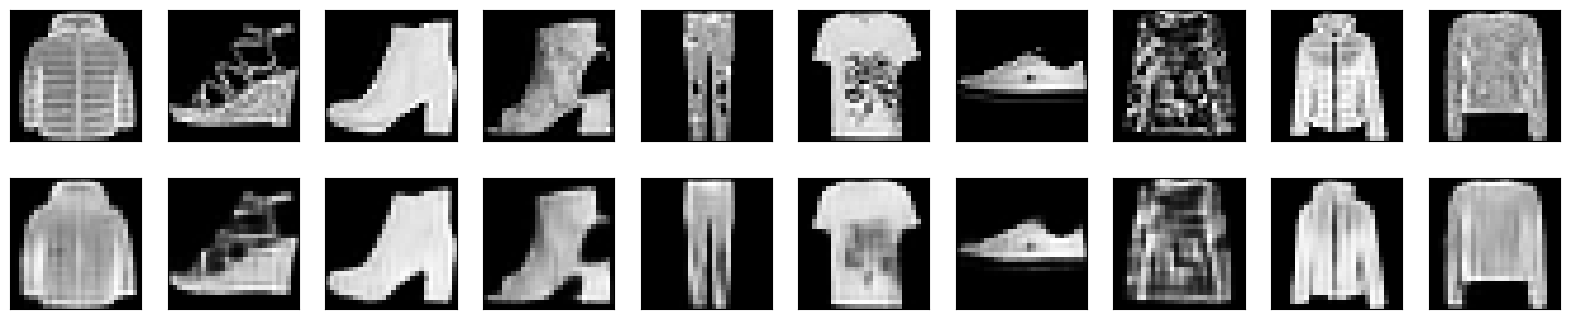

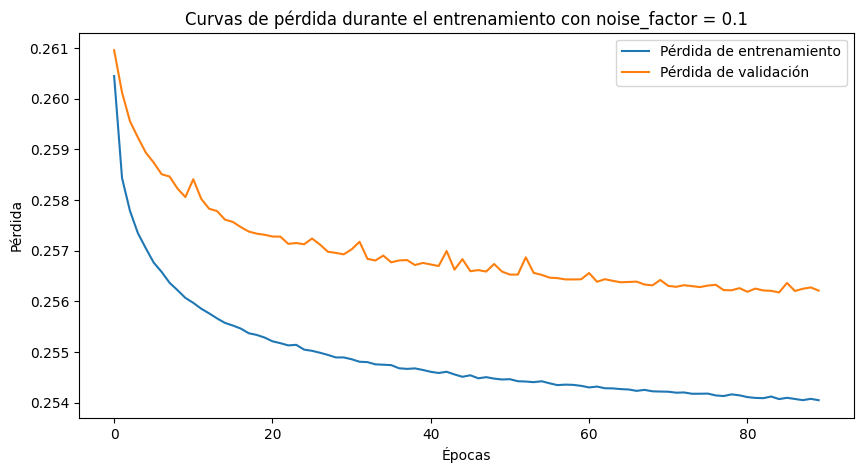

Epoch 1/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2646 - val_loss: 0.2644
Epoch 2/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2621 - val_loss: 0.2641
Epoch 3/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2619 - val_loss: 0.2640
Epoch 4/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2618 - val_loss: 0.2640
Epoch 5/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2618 - val_loss: 0.2639
Epoch 6/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2617 - val_loss: 0.2640
Epoch 7/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2617 - val_loss: 0.2638
Epoch 8/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2617 - val_loss: 0.2638
Epoch 9/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2616 - val_loss: 0.2637
Epoch 10/100
235/235 [==============================] - 4s 16ms/step - loss: 0.261

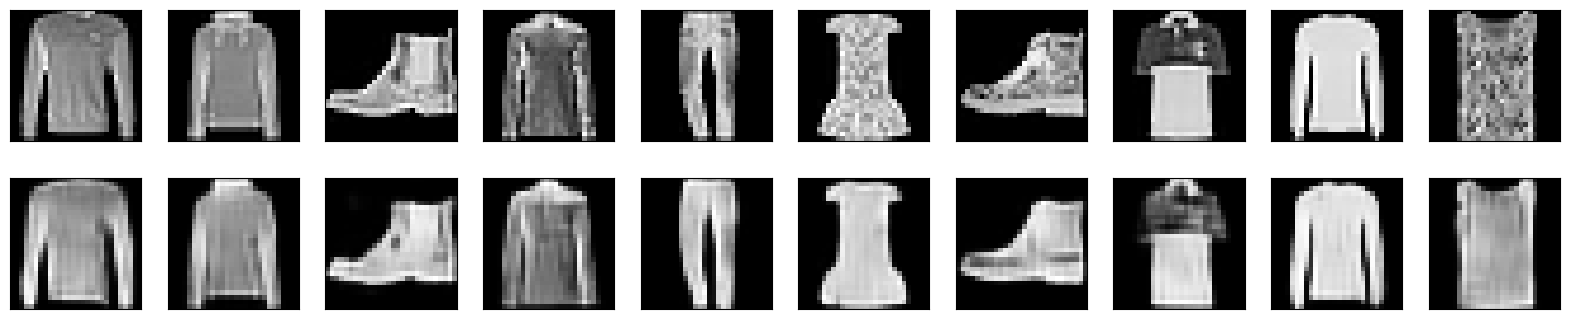

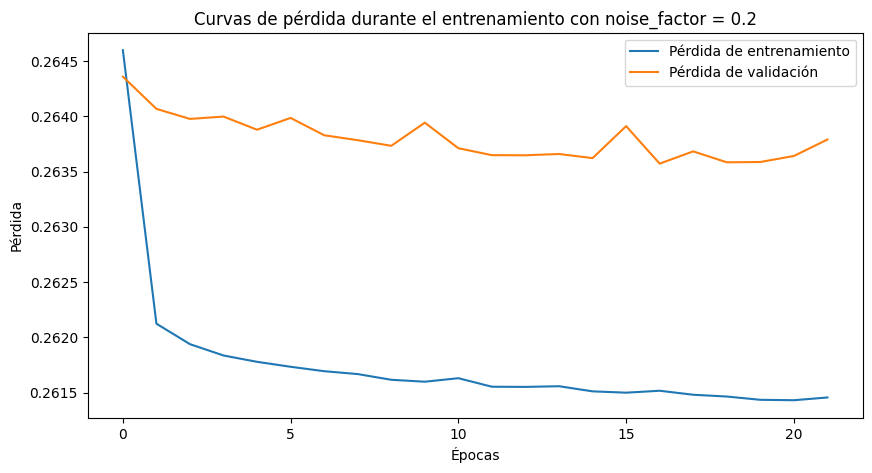

Epoch 1/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2717 - val_loss: 0.2731
Epoch 2/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2709 - val_loss: 0.2730
Epoch 3/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2707 - val_loss: 0.2728
Epoch 4/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2706 - val_loss: 0.2729
Epoch 5/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2705 - val_loss: 0.2728
Epoch 6/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2704 - val_loss: 0.2729
Epoch 7/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2704 - val_loss: 0.2729
Epoch 8/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2704 - val_loss: 0.2727
Epoch 9/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2703 - val_loss: 0.2726
Epoch 10/100
235/235 [==============================] - 4s 17ms/step - loss: 0.270

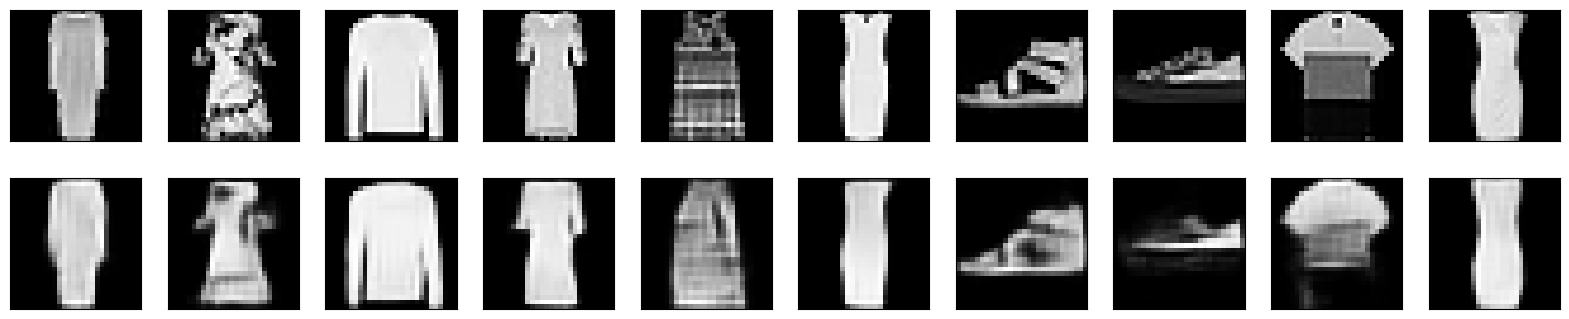

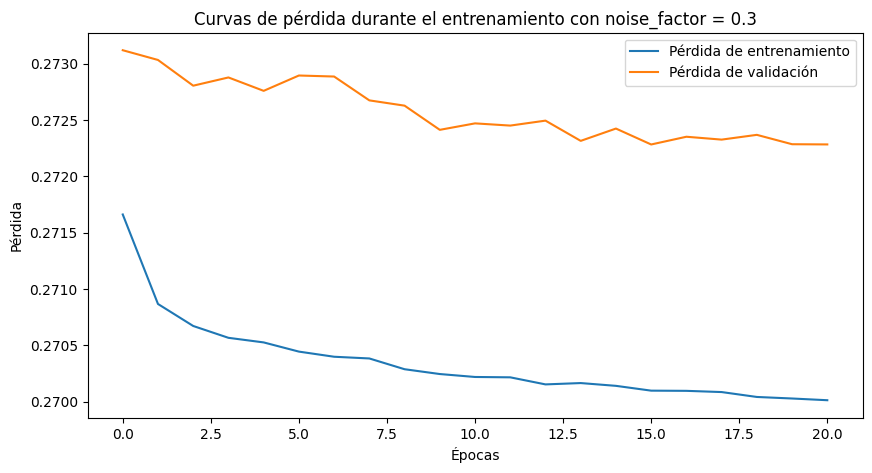

Epoch 1/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2808 - val_loss: 0.2830
Epoch 2/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2801 - val_loss: 0.2832
Epoch 3/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2801 - val_loss: 0.2823
Epoch 4/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2799 - val_loss: 0.2821
Epoch 5/100
235/235 [==============================] - 4s 18ms/step - loss: 0.2798 - val_loss: 0.2820
Epoch 6/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2797 - val_loss: 0.2819
Epoch 7/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2797 - val_loss: 0.2820
Epoch 8/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2796 - val_loss: 0.2821
Epoch 9/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2796 - val_loss: 0.2820
Epoch 10/100
235/235 [==============================] - 4s 18ms/step - loss: 0.279

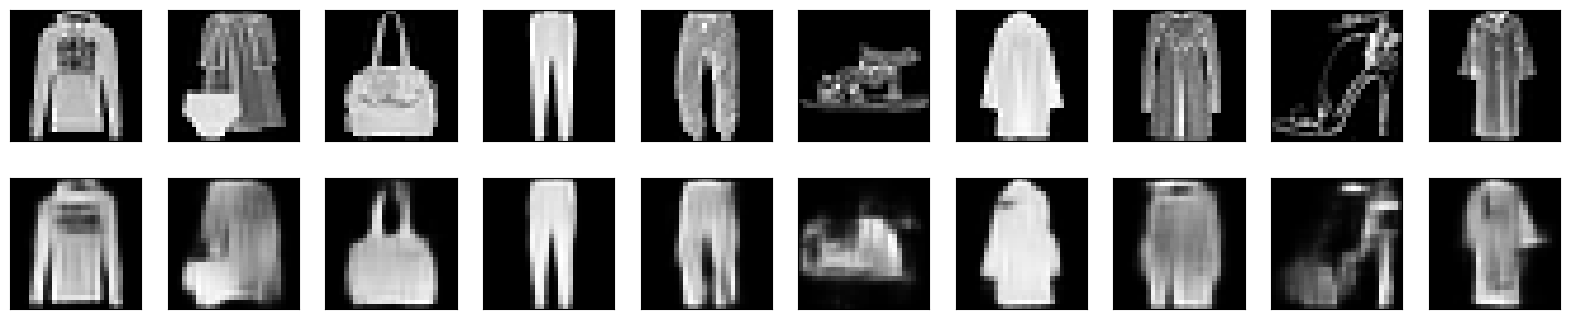

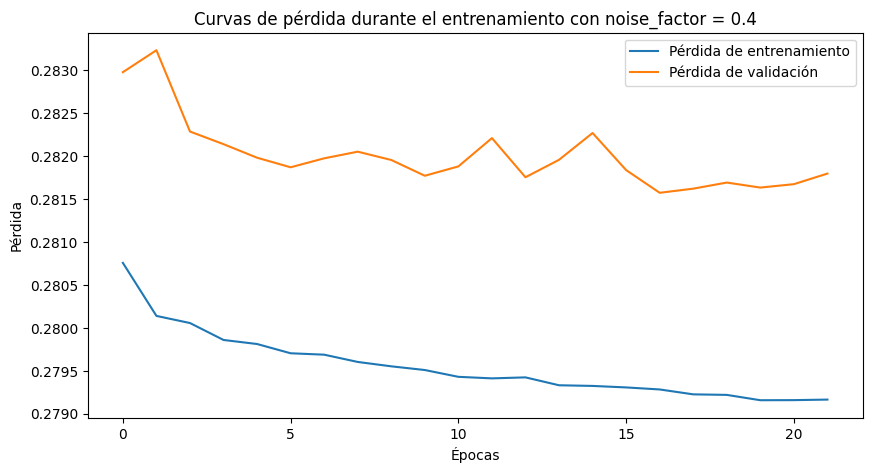

Epoch 1/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2900 - val_loss: 0.2918
Epoch 2/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2895 - val_loss: 0.2923
Epoch 3/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2893 - val_loss: 0.2916
Epoch 4/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2893 - val_loss: 0.2919
Epoch 5/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2891 - val_loss: 0.2916
Epoch 6/100
235/235 [==============================] - 4s 18ms/step - loss: 0.2891 - val_loss: 0.2914
Epoch 7/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2890 - val_loss: 0.2920
Epoch 8/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2890 - val_loss: 0.2912
Epoch 9/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2889 - val_loss: 0.2913
Epoch 10/100
235/235 [==============================] - 4s 17ms/step - loss: 0.288

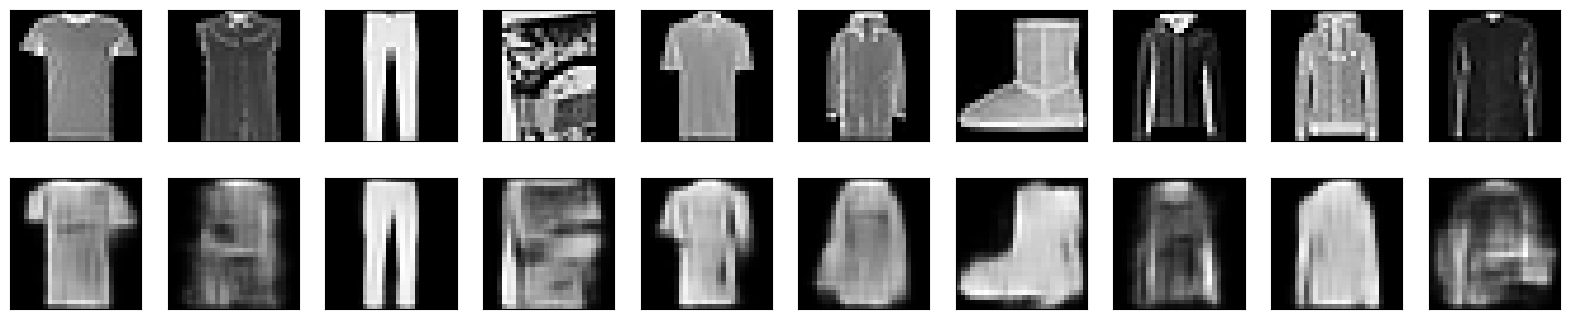

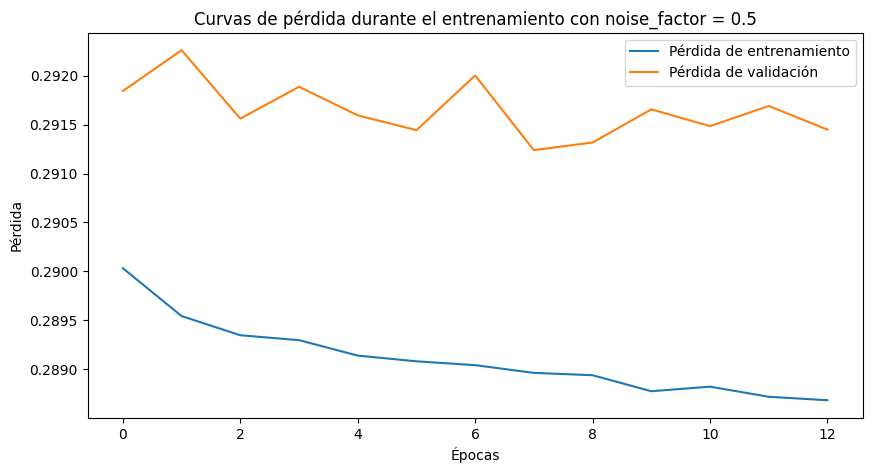

Epoch 1/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2996 - val_loss: 0.3017
Epoch 2/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2992 - val_loss: 0.3019
Epoch 3/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2991 - val_loss: 0.3012
Epoch 4/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2988 - val_loss: 0.3017
Epoch 5/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2989 - val_loss: 0.3014
Epoch 6/100
235/235 [==============================] - 4s 18ms/step - loss: 0.2986 - val_loss: 0.3009
Epoch 7/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2985 - val_loss: 0.3010
Epoch 8/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2985 - val_loss: 0.3013
Epoch 9/100
235/235 [==============================] - 4s 18ms/step - loss: 0.2984 - val_loss: 0.3008
Epoch 10/100
235/235 [==============================] - 4s 17ms/step - loss: 0.298

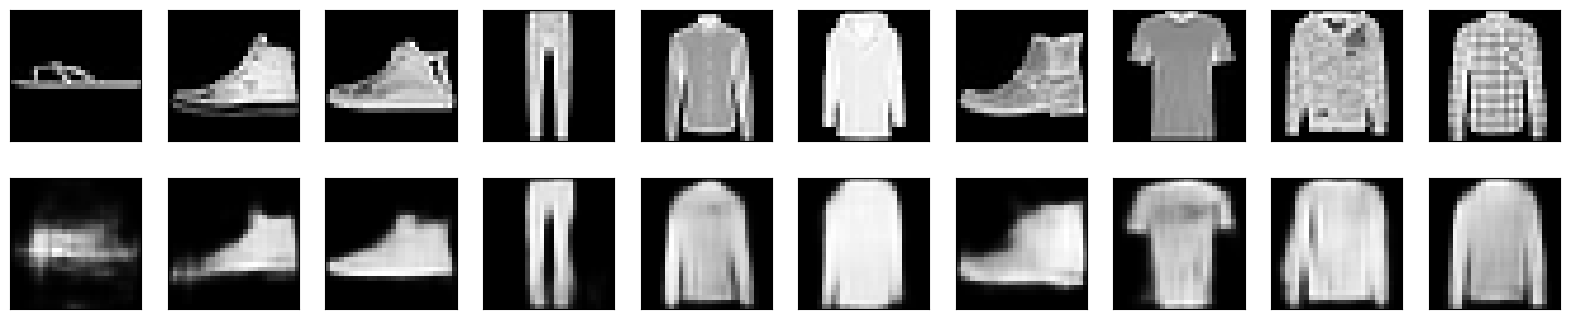

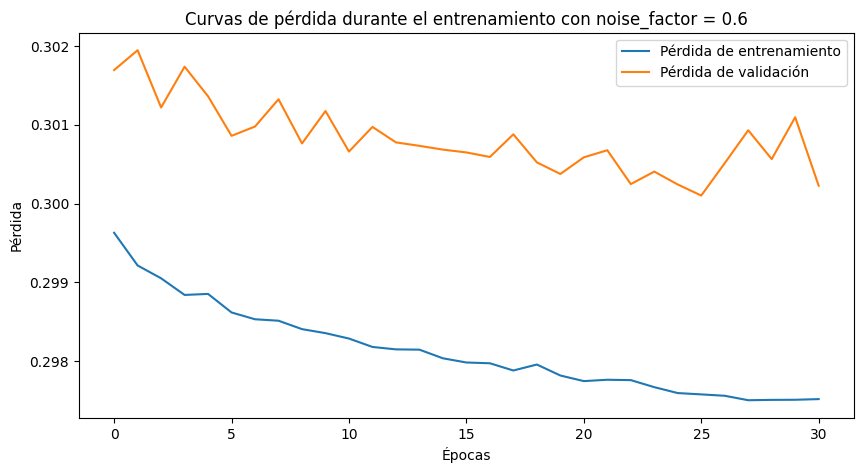

In [ ]:
noise_factors = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

for nf in noise_factors:
    noisy_train_data = noise(train_data, nf)
    noisy_test_data = noise(test_data, nf)

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = autoencoder.fit(noisy_train_data, train_data,
                              epochs=100,
                              batch_size=256,
                              shuffle=True,
                              validation_data=(noisy_test_data, test_data),
                              callbacks=[early_stopping])

    decoded_imgs = autoencoder.predict(noisy_test_data)
    print(f"Noise factor: {nf}")
    display(test_data, decoded_imgs)

    # Gráfico de las curvas de pérdida
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
    plt.plot(history.history['val_loss'], label='Pérdida de validación')
    plt.title(f'Curvas de pérdida durante el entrenamiento con noise_factor = {nf}')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.show()


* noise_factor = 0.1
  * Resultados Visuales: Las imágenes decodificadas presentan una mayor claridad en comparación con aquellas entrenadas con noise_factor = 0.4.
  * Curva de Pérdida: La pérdida de entrenamiento disminuyó a lo largo de las épocas, alcanzando valores alrededor de 0.254. La pérdida de validación mostró una tendencia similar, estabilizándose alrededor de 0.257.
* noise_factor = 0.2
  * Resultados Visuales: Las imágenes decodificadas mantienen buena calidad, con detalles claros.
  * Curva de Pérdida: La pérdida de entrenamiento y validación mostraron una tendencia a la baja, alcanzando aproximadamente 0.262. La pérdida de validación mostró mayor variabilidad que en el caso anterior.
* noise_factor = 0.3
  * Resultados Visuales: Las imágenes presentan un ligero desenfoque, aunque aún se mantienen reconocibles.
  * Curva de Pérdida: La pérdida de entrenamiento y validación alcanzaron valores cercanos a 0.272. La pérdida de validación mostró un comportamiento más estable en comparación con noise_factor = 0.2.
* noise_factor = 0.4
  * Resultados Visuales: Las imágenes decodificadas comienzan a mostrar una mayor distorsión.
  * Curva de Pérdida: La pérdida de entrenamiento y validación alcanzaron valores cercanos a 0.281. La pérdida de validación mostró una variabilidad significativa.
* noise_factor = 0.5
  * Resultados Visuales: Las imágenes decodificadas presentan una mayor distorsión y menos claridad.
  * Curva de Pérdida: La pérdida de entrenamiento y validación fueron alrededor de 0.290. La pérdida de validación mostró una mayor variabilidad, lo cual indica que el modelo tiene dificultades para generalizar con este nivel de ruido.
* noise_factor = 0.6
  * Resultados Visuales: Las imágenes presentan una distorsión notable, con detalles menos claros.
  * Curva de Pérdida: La pérdida de entrenamiento y validación alcanzaron valores cercanos a 0.297. La pérdida de validación mostró una alta variabilidad, sugiriendo que el modelo no maneja bien este nivel de ruido.
* Conclusiones
Efecto del Ruido: A medida que el noise_factor incrementa, la calidad de las imágenes decodificadas disminuye y la pérdida de validación tiende a ser más variable. Esto sugiere que el modelo es menos capaz de generalizar correctamente cuando se añade un mayor nivel de ruido.
* Mejor Desempeño: Los valores de noise_factor entre 0.1 y 0.3 parecen ser los más efectivos, logrando un equilibrio entre la reducción de pérdida y la calidad de las imágenes decodificadas.
* Estabilidad del Modelo: El uso de EarlyStopping es crucial para evitar el sobreentrenamiento, especialmente cuando se trabaja con niveles de ruido más altos.

###Apartado 7 Experimento 2: Generalización a Diferentes Tipos de Ruido

Investigar si el autoencoder entrenado puede generalizar y reconstruir imágenes con un tipo de ruido diferente sin realizar ningún otro entrenamiento.

Utilizaremos el autoencoder entrenado para reconstruir imágenes contaminadas con otro tipo de ruido generado por la función noise2(). Se evaluará la calidad de las imágenes reconstruidas y se analizarán las conclusiones.

313/313 [==============================] - 1s 2ms/step


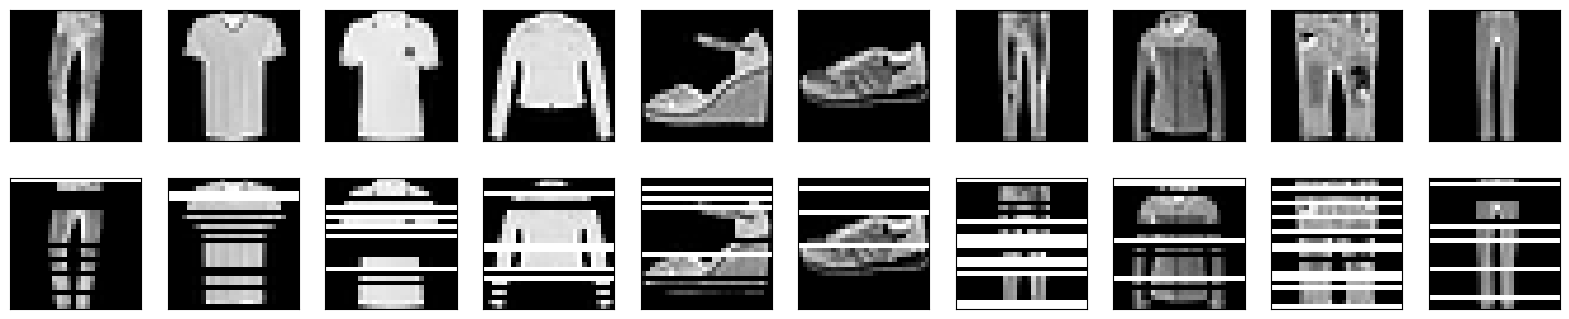

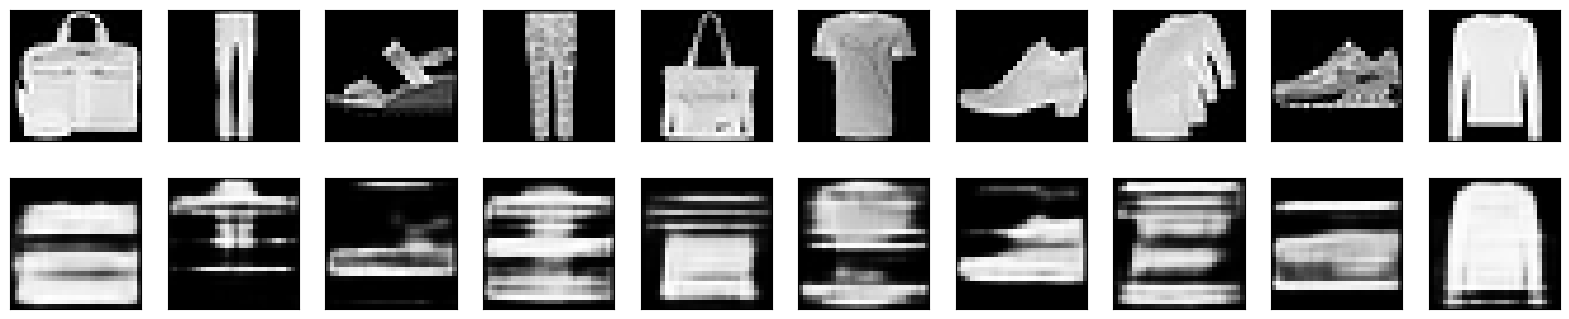

In [ ]:
# Aplicar otro tipo de ruido
noise_factor = 0.4
noisy_test_data_2 = noise2(test_data, noise_factor)

# Usar el autoencoder ya entrenado para reconstruir las imágenes con el nuevo ruido
decoded_imgs_2 = autoencoder.predict(noisy_test_data_2)

# Visualización de los resultados
display(test_data, noisy_test_data_2)
display(test_data, decoded_imgs_2)

El modelo no generaliza bien a diferentes tipos de ruido no vistos durante el entrenamiento, mostrando que está sobreajustado al patrón de ruido específico con el que fue entrenado.

###Preguntas

1. Tipo de Convolución en el Decoder
Tipo de Convolución a Emplear:

En el decoder, se deben emplear convoluciones transpuestas (también conocidas como convoluciones deconvolutivas o convoluciones de subida de muestreo). Las convoluciones transpuestas son las adecuadas para aumentar las dimensiones espaciales de las características y devolverlas al tamaño original de la imagen de entrada.

Justificación:

Las convoluciones transpuestas permiten al modelo aprender cómo reconstruir las imágenes originales a partir de las características comprimidas, efectivamente invirtiendo el proceso realizado por las capas de convolución en el encoder. Las convoluciones 2D convencionales por sí solas no pueden aumentar las dimensiones espaciales de las características. Por lo tanto, una combinación de convoluciones transpuestas y operaciones de subida de muestreo se utiliza generalmente para construir el decoder simétrico al encoder.

2. Función de Activación y Función de Pérdida en la Salida
Función de Activación:

La función de activación en la capa de salida del autoencoder debe ser sigmoid (si los datos están normalizados entre 0 y 1) o tanh (si los datos están normalizados entre -1 y 1).

Justificación:

Estas funciones de activación son adecuadas porque limitan los valores de salida dentro del rango deseado (0 a 1 para sigmoid y -1 a 1 para tanh). Esto es importante para asegurar que las reconstrucciones de las imágenes tengan valores de píxeles dentro del rango adecuado.

Función de Pérdida:

La función de pérdida adecuada para el autoencoder es el error cuadrático medio (MSE, por sus siglas en inglés).

Justificación:

El MSE mide la diferencia promedio al cuadrado entre las imágenes de entrada y las imágenes reconstruidas. Esta métrica es adecuada para capturar la calidad de la reconstrucción de las imágenes en términos de los valores de los píxeles.

3. Entradas y Salidas al Entrenar el Autoencoder
Entradas (X) y Salidas (y):

Las entradas (X) son las imágenes originales con ruido añadido.
Las salidas (y) son las imágenes originales sin ruido.
Justificación:

Al entrenar el autoencoder, el objetivo es que el modelo aprenda a eliminar el ruido de las imágenes y reconstruir las imágenes originales a partir de las ruidosas. Por lo tanto, las imágenes ruidosas se utilizan como entradas, y las imágenes originales se utilizan como salidas (objetivos) para entrenar el modelo.

Autoencoders como Técnicas No Supervisadas:

Los autoencoders son considerados técnicas no supervisadas porque no requieren etiquetas explícitas diferentes de las propias entradas. En otras palabras, el autoencoder se entrena utilizando las mismas imágenes de entrada para aprender una representación comprimida y luego reconstruir las mismas imágenes. Las "etiquetas" en este caso son las propias imágenes de entrada.

Etiquetas Anotadas Empleadas:

En el contexto del autoencoder, las etiquetas anotadas son las mismas imágenes de entrada sin ruido. No se requiere una anotación externa adicional porque el objetivo es aprender a reconstruir la entrada original a partir de una versión degradada o comprimida